# Lending Club Loan Default Risk Analysis
## Introduction
In the lending industry, effectively managing loan risk is essential to reducing potential financial losses. This analysis focuses on how data can help mitigate the risk of loan defaults by identifying key patterns and risk factors.

## Business Problem
The company is a leading online loan marketplace offering a range of loans, including personal, business, and medical financing. The risk lies in approving loans for high-risk applicants, which can lead to financial losses when they default. The challenge is to minimize these losses by identifying risky borrowers while still approving loans for qualified applicants.

## Objective
The main objective is to reduce credit losses by using Exploratory Data Analysis (EDA) to uncover factors that contribute to loan defaults. By analyzing historical data, we aim to identify patterns that can predict the likelihood of default and enable smarter lending decisions.

## Key Risks
The company must balance two risks:

* Rejecting Low-Risk Applicants: Misclassifying good borrowers as defaulters can result in lost business opportunities.
* Approving High-Risk Applicants: Granting loans to borrowers who are likely to default can lead to significant financial losses.

## Data and Analysis Approach
The dataset contains historical loan data, with each row representing an individual loan and applicant. The goal is to analyze this data to identify trends that help reduce loan defaults while ensuring viable applicants are approved.

### Analysis Process:
1. Data Exploration
    Familiarize with the dataset, its structure, and key variables.
2. Data Preprocessing
    Clean and transform the data to prepare it for analysis, including handling missing values, outliers, and inconsistencies.
3. Data Visualization and Insights
    Use charts and graphs to explore relationships between variables and uncover patterns or trends related to loan defaults.
4. Findings and Recommendations
    Summarize key insights and provide actionable recommendations based on the analysis.

### Importing or loading all the necessary libraries

In [7]:
# Importing or loading all the necessary libraries.
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as py
import warnings 
warnings.filterwarnings("ignore")

### Display Settings

In [9]:
# Display all columns
pd.set_option('display.max_columns', None)
# Display 100 rows
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', None)

# Setting width
pd.set_option('display.width', None)

# Setting style for seaonrn
sns.color_palette("cubehelix", 8)
sns.set_style("whitegrid", {'axes.grid' : False})


### Read data set into data frames

In [13]:
# Read the dataset
loan = pd.read_csv('loan.csv')
dict = pd.read_excel('Data_Dictionary.xlsx')

### Rows and columns of loan and dictionary data frames

In [16]:
# Loan data dimensions 
loan.shape

(39717, 111)

In [18]:
# Dictionary data deimensions
dict.shape

(117, 2)

In [20]:
# Printing first 5 row of loan data
loan.head()

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0  1077501    1296599       5000         5000           4975.0   36 months   
1  1077430    1314167       2500         2500           2500.0   60 months   
2  1077175    1313524       2400         2400           2400.0   36 months   
3  1076863    1277178      10000        10000          10000.0   36 months   
4  1075358    1311748       3000         3000           3000.0   60 months   

  int_rate  installment grade sub_grade                 emp_title emp_length  \
0   10.65%       162.87     B        B2                       NaN  10+ years   
1   15.27%        59.83     C        C4                     Ryder   < 1 year   
2   15.96%        84.33     C        C5                       NaN  10+ years   
3   13.49%       339.31     C        C1       AIR RESOURCES BOARD  10+ years   
4   12.69%        67.79     B        B5  University Medical Group     1 year   

  home_ownership  annual_inc verification_status issue_d  loan_status  \
0           RENT     24000.0            Verified  Dec-11   Fully Paid   
1           RENT     30000.0     Source Verified  Dec-11  Charged Off   
2           RENT     12252.0        Not Verified  Dec-11   Fully Paid   
3           RENT     49200.0     Source Verified  Dec-11   Fully Paid   
4           RENT     80000.0     Source Verified  Dec-11      Current   

  pymnt_plan                                                url  \
0          n  https://lendingclub.com/browse/loanDetail.acti...   
1          n  https://lendingclub.com/browse/loanDetail.acti...   
2          n  https://lendingclub.com/browse/loanDetail.acti...   
3          n  https://lendingclub.com/browse/loanDetail.acti...   
4          n  https://lendingclub.com/browse/loanDetail.acti...   

                                                desc         purpose  \
0    Borrower added on 12/22/11 > I need to upgra...     credit_card   
1    Borrower added on 12/22/11 > I plan to use t...             car   
2                                                NaN  small_business   
3    Borrower added on 12/21/11 > to pay for prop...           other   
4    Borrower added on 12/21/11 > I plan on combi...           other   

                  title zip_code addr_state    dti  delinq_2yrs  \
0              Computer    860xx         AZ  27.65            0   
1                  bike    309xx         GA   1.00            0   
2  real estate business    606xx         IL   8.72            0   
3              personel    917xx         CA  20.00            0   
4              Personal    972xx         OR  17.94            0   

  earliest_cr_line  inq_last_6mths  mths_since_last_delinq  \
0           Jan-85               1                     NaN   
1           Apr-99               5                     NaN   
2           Nov-01               2                     NaN   
3           Feb-96               1                    35.0   
4           Jan-96               0                    38.0   

   mths_since_last_record  open_acc  pub_rec  revol_bal revol_util  total_acc  \
0                     NaN         3        0      13648     83.70%          9   
1                     NaN         3        0       1687      9.40%          4   
2                     NaN         2        0       2956     98.50%         10   
3                     NaN        10        0       5598        21%         37   
4                     NaN        15        0      27783     53.90%         38   

  initial_list_status  out_prncp  out_prncp_inv   total_pymnt  \
0                   f       0.00           0.00   5863.155187   
1                   f       0.00           0.00   1008.710000   
2                   f       0.00           0.00   3005.666844   
3                   f       0.00           0.00  12231.890000   
4                   f     524.06         524.06   3513.330000   

   total_pymnt_inv  total_rec_prncp  total_rec_int  total_rec_late_fee  \
0          5833.84          5000.00         863.16     

In [22]:
# Printing first 5 row of dictionary data
dict.head()

LoanStatNew                                        Description
0        acc_now_delinq  The number of accounts on which the borrower i...
1  acc_open_past_24mths         Number of trades opened in past 24 months.
2            addr_state  The state provided by the borrower in the loan...
3              all_util              Balance to credit limit on all trades
4            annual_inc  The self-reported annual income provided by th...

## Data Exploration & Data Preprocessing

In [25]:
# Basic information of loan data
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


In [27]:
# Basic information of dictionary data
dict.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117 entries, 0 to 116
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   LoanStatNew  115 non-null    object
 1   Description  116 non-null    object
dtypes: object(2)
memory usage: 2.0+ KB


In [29]:
# Stats of loan data
loan.describe()

id     member_id     loan_amnt   funded_amnt  \
count  3.971700e+04  3.971700e+04  39717.000000  39717.000000   
mean   6.831319e+05  8.504636e+05  11219.443815  10947.713196   
std    2.106941e+05  2.656783e+05   7456.670694   7187.238670   
min    5.473400e+04  7.069900e+04    500.000000    500.000000   
25%    5.162210e+05  6.667800e+05   5500.000000   5400.000000   
50%    6.656650e+05  8.508120e+05  10000.000000   9600.000000   
75%    8.377550e+05  1.047339e+06  15000.000000  15000.000000   
max    1.077501e+06  1.314167e+06  35000.000000  35000.000000   

       funded_amnt_inv   installment    annual_inc           dti  \
count     39717.000000  39717.000000  3.971700e+04  39717.000000   
mean      10397.448868    324.561922  6.896893e+04     13.315130   
std        7128.450439    208.874874  6.379377e+04      6.678594   
min           0.000000     15.690000  4.000000e+03      0.000000   
25%        5000.000000    167.020000  4.040400e+04      8.170000   
50%        8975.000000    280.220000  5.900000e+04     13.400000   
75%       14400.000000    430.780000  8.230000e+04     18.600000   
max       35000.000000   1305.190000  6.000000e+06     29.990000   

        delinq_2yrs  inq_last_6mths  mths_since_last_delinq  \
count  39717.000000    39717.000000            14035.000000   
mean       0.146512        0.869200               35.900962   
std        0.491812        1.070219               22.020060   
min        0.000000        0.000000                0.000000   
25%        0.000000        0.000000               18.000000   
50%        0.000000        1.000000               34.000000   
75%        0.000000        1.000000               52.000000   
max       11.000000        8.000000              120.000000   

       mths_since_last_record      open_acc       pub_rec      revol_bal  \
count             2786.000000  39717.000000  39717.000000   39717.000000   
mean                69.698134      9.294408      0.055065   13382.528086   
std                 43.822529      4.400282      0.237200   15885.016641   
min                  0.000000      2.000000      0.000000       0.000000   
25%                 22.000000      6.000000      0.000000    3703.000000   
50%                 90.000000      9.000000      0.000000    8850.000000   
75%                104.000000     12.000000      0.000000   17058.000000   
max                129.000000     44.000000      4.000000  149588.000000   

          total_acc     out_prncp  out_prncp_inv   total_pymnt  \
count  39717.000000  39717.000000   39717.000000  39717.000000   
mean      22.088828     51.227887      50.989768  12153.596544   
std       11.401709    375.172839     373.824457   9042.040766   
min        2.000000      0.000000       0.000000      0.000000   
25%       13.000000      0.000000       0.000000   5576.930000   
50%       20.000000      0.000000       0.000000   9899.640319   
75%       29.000000      0.000000       0.000000  16534.433040   
max       90.000000   6311.470000    6307.370000  58563.679930   

       total_pymnt_inv  total_rec_prncp  total_rec_int  total_rec_late_fee  \
count     39717.000000     39717.000000   39717.000000        39717.000000   
mean      11567.149118      9793.348813    2263.663172            1.363015   
std        8942.672613      7065.522127    2608.111964            7.289979   
min           0.000000         0.000000       0.000000            0.000000   
25%        5112.310000      4600.000000     662.180000            0.000000   
50%        9287.150000      8000.000000    1348.910000            0.000000   
75%       15798.810000     13653.260000    2833.400000            0.000000   
max       58563.680000     35000.020000   23563.680000          180.200000   

         recoveries  collection_recovery_fee  last_pymnt_amnt  \
count  39717.000000             39717.000000     39717.000000   
mean      95.221624                12.406112      2678.826162   
std      688.744771               148.671593      4447.136012   
min    

In [31]:
# Data type of loan data
loan.dtypes

id                              int64
member_id                       int64
loan_amnt                       int64
funded_amnt                     int64
funded_amnt_inv               float64
                               ...   
tax_liens                     float64
tot_hi_cred_lim               float64
total_bal_ex_mort             float64
total_bc_limit                float64
total_il_high_credit_limit    float64
Length: 111, dtype: object

In [33]:
# Value count of data type 
loan.dtypes.value_counts()

float64    74
object     24
int64      13
Name: count, dtype: int64

In [35]:
# Getting columns of loan data
loan.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq',
       'percent_bc_gt_75', 'pub_rec_bankruptcies', 'tax_liens',
       'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit',
       'total_il_high_credit_limit'],
      dtype='object', length=111)

In [37]:
# Listing columns of loan data
loan.columns.to_list()

['id',
 'member_id',
 'loan_amnt',
 'funded_amnt',
 'funded_amnt_inv',
 'term',
 'int_rate',
 'installment',
 'grade',
 'sub_grade',
 'emp_title',
 'emp_length',
 'home_ownership',
 'annual_inc',
 'verification_status',
 'issue_d',
 'loan_status',
 'pymnt_plan',
 'url',
 'desc',
 'purpose',
 'title',
 'zip_code',
 'addr_state',
 'dti',
 'delinq_2yrs',
 'earliest_cr_line',
 'inq_last_6mths',
 'mths_since_last_delinq',
 'mths_since_last_record',
 'open_acc',
 'pub_rec',
 'revol_bal',
 'revol_util',
 'total_acc',
 'initial_list_status',
 'out_prncp',
 'out_prncp_inv',
 'total_pymnt',
 'total_pymnt_inv',
 'total_rec_prncp',
 'total_rec_int',
 'total_rec_late_fee',
 'recoveries',
 'collection_recovery_fee',
 'last_pymnt_d',
 'last_pymnt_amnt',
 'next_pymnt_d',
 'last_credit_pull_d',
 'collections_12_mths_ex_med',
 'mths_since_last_major_derog',
 'policy_code',
 'application_type',
 'annual_inc_joint',
 'dti_joint',
 'verification_status_joint',
 'acc_now_delinq',
 'tot_coll_amt',
 'tot_cur_

In [39]:
# Cheking for null values 
loan.isna().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

In [41]:
# Checking for % of null values
100*loan.isna().sum()/len(loan)

id                              0.000000
member_id                       0.000000
loan_amnt                       0.000000
funded_amnt                     0.000000
funded_amnt_inv                 0.000000
                                 ...    
tax_liens                       0.098195
tot_hi_cred_lim               100.000000
total_bal_ex_mort             100.000000
total_bc_limit                100.000000
total_il_high_credit_limit    100.000000
Length: 111, dtype: float64

In [43]:
# Checking for % of null values in descending order
(100*loan.isna().sum()/len(loan)).sort_values(ascending = False)

verification_status_joint    100.0
annual_inc_joint             100.0
mo_sin_old_rev_tl_op         100.0
mo_sin_old_il_acct           100.0
bc_util                      100.0
                             ...  
delinq_amnt                    0.0
policy_code                    0.0
earliest_cr_line               0.0
delinq_2yrs                    0.0
id                             0.0
Length: 111, dtype: float64

In [45]:
# Checkig for columns having null values greater than 50%
loan.loc[:,(100*loan.isna().sum()/len(loan))>50]

mths_since_last_delinq  mths_since_last_record next_pymnt_d  \
0                         NaN                     NaN          NaN   
1                         NaN                     NaN          NaN   
2                         NaN                     NaN          NaN   
3                        35.0                     NaN          NaN   
4                        38.0                     NaN       Jun-16   
...                       ...                     ...          ...   
39712                     0.0                     0.0          NaN   
39713                     5.0                     0.0          NaN   
39714                     0.0                     0.0          NaN   
39715                     0.0                     0.0          NaN   
39716                    11.0                     0.0          NaN   

       mths_since_last_major_derog  annual_inc_joint  dti_joint  \
0                              NaN               NaN        NaN   
1                              NaN               NaN        NaN   
2                              NaN               NaN        NaN   
3                              NaN               NaN        NaN   
4                              NaN               NaN        NaN   
...                            ...               ...        ...   
39712                          NaN               NaN        NaN   
39713                          NaN               NaN        NaN   
39714                          NaN               NaN        NaN   
39715                          NaN               NaN        NaN   
39716                          NaN               NaN        NaN   

       verification_status_joint  tot_coll_amt  tot_cur_bal  open_acc_6m  \
0                            NaN           NaN          NaN          NaN   
1                            NaN           NaN          NaN          NaN   
2                            NaN           NaN          NaN          NaN   
3                            NaN           NaN          NaN          NaN   
4                            NaN           NaN          NaN          NaN   
...                          ...           ...          ...          ...   
39712                        NaN           NaN          NaN          NaN   
39713                        NaN           NaN          NaN          NaN   
39714                        NaN           NaN          NaN          NaN   
39715                        NaN           NaN          NaN          NaN   
39716                        NaN           NaN          NaN          NaN   

       open_il_6m  open_il_12m  open_il_24m  mths_since_rcnt_il  total_bal_il  \
0             NaN          NaN          NaN                 NaN           NaN   
1             NaN          NaN          NaN                 NaN           NaN   
2             NaN          NaN          NaN                 NaN           NaN   
3             NaN          NaN          NaN                 NaN           NaN   
4             NaN          NaN          NaN                 NaN           NaN   
...           ...          ...          ...                 ...           ...   
39712         NaN          NaN          NaN                 NaN           NaN   
39713         NaN          NaN          NaN                 NaN           NaN   
39714         NaN          NaN          NaN                 NaN           NaN   
39715         NaN          NaN          NaN                 NaN           NaN   
39716         NaN          NaN          NaN                 NaN           NaN   

       il_util  open_rv_12m  open_rv_24m  max_bal_bc  all_util  \
0          NaN          NaN          NaN         NaN       NaN   
1          NaN          NaN          NaN         NaN       NaN   
2          NaN          NaN          NaN         NaN       NaN   
3          NaN          NaN          NaN         NaN       NaN   
4          NaN          NaN          NaN         NaN       NaN   
...        ...          ...          ...         ...       ...   
39712      Na

There are many columns having more than 50% of the values as null and should not be considered as deciding factor

In [48]:
# Removing columns having null values greater than 50% as they dont contribute to decisions
loan = loan.loc[:,(100*loan.isna().sum()/len(loan))<50]

In [50]:
# cheking the dimenstions after removing the columns have more than 50% null values data
loan.shape

(39717, 54)

In [52]:
# Checking for % of null values in descending order after removing the columns having mroe than 50% null values data
(100*loan.isna().sum()/len(loan)).sort_values(ascending = False)

desc                          32.585543
emp_title                      6.191303
emp_length                     2.706650
pub_rec_bankruptcies           1.754916
last_pymnt_d                   0.178765
collections_12_mths_ex_med     0.140998
chargeoff_within_12_mths       0.140998
revol_util                     0.125891
tax_liens                      0.098195
title                          0.027696
last_credit_pull_d             0.005036
total_rec_prncp                0.000000
out_prncp                      0.000000
initial_list_status            0.000000
out_prncp_inv                  0.000000
total_acc                      0.000000
total_pymnt                    0.000000
total_pymnt_inv                0.000000
collection_recovery_fee        0.000000
total_rec_int                  0.000000
total_rec_late_fee             0.000000
recoveries                     0.000000
pub_rec                        0.000000
last_pymnt_amnt                0.000000
policy_code                    0.000000


In [54]:
# Checking for duplicates rows and remove them
loan.duplicated().any()

False

There are no duplicate rows. We don't clean to clean those row

In [57]:
# Checking for rows having null values across columns
loan.isnull().sum(axis=1).max()

6

There very less null values in a row and we don't need to handle those

In [60]:
# Droping records of loan_status = 'Current', because it cannot provide insights like the borrower is defaulter or not
loan = loan[loan['loan_status'] != 'Current'] 

In [62]:
# Checking the remaining columns after removing null columns of 50%
loan.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'pymnt_plan', 'url', 'desc', 'purpose',
       'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'inq_last_6mths', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'initial_list_status',
       'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv',
       'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'last_credit_pull_d', 'collections_12_mths_ex_med', 'policy_code',
       'application_type', 'acc_now_delinq', 'chargeoff_within_12_mths',
       'delinq_amnt', 'pub_rec_bankruptcies', 'tax_liens'],
      dtype='object')

In [64]:
# Printing first 5 rows of data 
loan.head()

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0  1077501    1296599       5000         5000           4975.0   36 months   
1  1077430    1314167       2500         2500           2500.0   60 months   
2  1077175    1313524       2400         2400           2400.0   36 months   
3  1076863    1277178      10000        10000          10000.0   36 months   
5  1075269    1311441       5000         5000           5000.0   36 months   

  int_rate  installment grade sub_grade             emp_title emp_length  \
0   10.65%       162.87     B        B2                   NaN  10+ years   
1   15.27%        59.83     C        C4                 Ryder   < 1 year   
2   15.96%        84.33     C        C5                   NaN  10+ years   
3   13.49%       339.31     C        C1   AIR RESOURCES BOARD  10+ years   
5    7.90%       156.46     A        A4  Veolia Transportaton    3 years   

  home_ownership  annual_inc verification_status issue_d  loan_status  \
0           RENT     24000.0            Verified  Dec-11   Fully Paid   
1           RENT     30000.0     Source Verified  Dec-11  Charged Off   
2           RENT     12252.0        Not Verified  Dec-11   Fully Paid   
3           RENT     49200.0     Source Verified  Dec-11   Fully Paid   
5           RENT     36000.0     Source Verified  Dec-11   Fully Paid   

  pymnt_plan                                                url  \
0          n  https://lendingclub.com/browse/loanDetail.acti...   
1          n  https://lendingclub.com/browse/loanDetail.acti...   
2          n  https://lendingclub.com/browse/loanDetail.acti...   
3          n  https://lendingclub.com/browse/loanDetail.acti...   
5          n  https://lendingclub.com/browse/loanDetail.acti...   

                                                desc         purpose  \
0    Borrower added on 12/22/11 > I need to upgra...     credit_card   
1    Borrower added on 12/22/11 > I plan to use t...             car   
2                                                NaN  small_business   
3    Borrower added on 12/21/11 > to pay for prop...           other   
5                                                NaN         wedding   

                                   title zip_code addr_state    dti  \
0                               Computer    860xx         AZ  27.65   
1                                   bike    309xx         GA   1.00   
2                   real estate business    606xx         IL   8.72   
3                               personel    917xx         CA  20.00   
5  My wedding loan I promise to pay back    852xx         AZ  11.20   

   delinq_2yrs earliest_cr_line  inq_last_6mths  open_acc  pub_rec  revol_bal  \
0            0           Jan-85               1         3        0      13648   
1            0           Apr-99               5         3        0       1687   
2            0           Nov-01               2         2        0       2956   
3            0           Feb-96               1        10        0       5598   
5            0           Nov-04               3         9        0       7963   

  revol_util  total_acc initial_list_status  out_prncp  out_prncp_inv  \
0     83.70%          9                   f        0.0            0.0   
1      9.40%          4                   f        0.0            0.0   
2     98.50%         10                   f        0.0            0.0   
3        21%         37                   f        0.0            0.0   
5     28.30%         12                   f        0.0            0.0   

    total_pymnt  total_pymnt_inv  total_rec_prncp  total_rec_int  \
0   5863.155187          5833.84          5000.00         863.16   
1   1008.710000          1008.71           456.46         435.17   
2   3005.666844          3005.67          2400.00         605.67   
3  12231.890000         12231.89         10000.00        2214.92   
5   5632.210000          5632.21          5000.00         632.21   

   total_rec_late_fee  recoveries  collection

In [66]:
# Elimination of Irrelevant Columns
# The following columns have been discarded since they pertain to customer behavior and are calculated post-approval, rendering them irrelevant for our analysis.
loan=loan.drop(['delinq_2yrs','earliest_cr_line','open_acc','pub_rec','revol_bal','inq_last_6mths','revol_util','total_acc','out_prncp','out_prncp_inv','total_pymnt','total_pymnt_inv','total_rec_prncp','total_rec_int','total_rec_late_fee','recoveries','collection_recovery_fee','last_pymnt_d','last_pymnt_amnt','last_credit_pull_d','application_type'],axis=1)
#This was followed by the removal of additional columns that lack significance for the analysis, as they contain random variables.
loan=loan.drop(['title','emp_title','desc','url'],axis=1)
#Dropping member_id since it duplicates the index column and is unnecessary for analysis
loan = loan.drop(['member_id'], axis=1)
#Excluding funded_amnt_inv as it is internal data calculated post-loan approval and, therefore, not suitable for analysis
loan= loan.drop(['funded_amnt_inv'], axis=1)
#Next, we eliminated zip_code since it consists of masked data that cannot be utilized as input for the analysis. The member_id column, which serves as a duplicate index and is unnecessary for our purposes, was also dropped. Additionally, we removed funded_amnt_inv, as it represents internal data computed after loan approval, making it unsuitable for our analysis.
loan=loan.drop(['zip_code'],axis=1)

#These columns were eliminated due to their relevance to customer behavior, which is not available at the time of decision-making and, therefore, does not contribute to our analysis.



In [68]:
# Checking dimensions of data after removing unncessary columns
loan.shape

(38577, 26)

In [70]:
# Checking columns of data
loan.columns

Index(['id', 'loan_amnt', 'funded_amnt', 'term', 'int_rate', 'installment',
       'grade', 'sub_grade', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'pymnt_plan',
       'purpose', 'addr_state', 'dti', 'initial_list_status',
       'collections_12_mths_ex_med', 'policy_code', 'acc_now_delinq',
       'chargeoff_within_12_mths', 'delinq_amnt', 'pub_rec_bankruptcies',
       'tax_liens'],
      dtype='object')

In [73]:
# printing first 5 rows of data
loan.head()

id  loan_amnt  funded_amnt        term int_rate  installment grade  \
0  1077501       5000         5000   36 months   10.65%       162.87     B   
1  1077430       2500         2500   60 months   15.27%        59.83     C   
2  1077175       2400         2400   36 months   15.96%        84.33     C   
3  1076863      10000        10000   36 months   13.49%       339.31     C   
5  1075269       5000         5000   36 months    7.90%       156.46     A   

  sub_grade emp_length home_ownership  annual_inc verification_status issue_d  \
0        B2  10+ years           RENT     24000.0            Verified  Dec-11   
1        C4   < 1 year           RENT     30000.0     Source Verified  Dec-11   
2        C5  10+ years           RENT     12252.0        Not Verified  Dec-11   
3        C1  10+ years           RENT     49200.0     Source Verified  Dec-11   
5        A4    3 years           RENT     36000.0     Source Verified  Dec-11   

   loan_status pymnt_plan         purpose addr_state    dti  \
0   Fully Paid          n     credit_card         AZ  27.65   
1  Charged Off          n             car         GA   1.00   
2   Fully Paid          n  small_business         IL   8.72   
3   Fully Paid          n           other         CA  20.00   
5   Fully Paid          n         wedding         AZ  11.20   

  initial_list_status  collections_12_mths_ex_med  policy_code  \
0                   f                         0.0            1   
1                   f                         0.0            1   
2                   f                         0.0            1   
3                   f                         0.0            1   
5                   f                         0.0            1   

   acc_now_delinq  chargeoff_within_12_mths  delinq_amnt  \
0               0                       0.0            0   
1               0                       0.0            0   
2               0                       0.0            0   
3               0                       0.0            0   
5               0                       0.0            0   

   pub_rec_bankruptcies  tax_liens  
0                   0.0        0.0  
1                   0.0        0.0  
2                   0.0        0.0  
3                   0.0        0.0  
5                   0.0        0.0

In [77]:
# checking number of unique values
loan.nunique().sort_values()

tax_liens                         1
pymnt_plan                        1
collections_12_mths_ex_med        1
policy_code                       1
initial_list_status               1
chargeoff_within_12_mths          1
delinq_amnt                       1
acc_now_delinq                    1
term                              2
loan_status                       2
verification_status               3
pub_rec_bankruptcies              3
home_ownership                    5
grade                             7
emp_length                       11
purpose                          14
sub_grade                        35
addr_state                       50
issue_d                          55
int_rate                        370
loan_amnt                       870
funded_amnt                    1019
dti                            2853
annual_inc                     5215
installment                   15022
id                            38577
dtype: int64

In [78]:
# Removing columns with only one unique value as these are repeatitive and don't impact analysis
loan = loan.loc[:,loan.nunique()>1]

In [81]:
# Checking dimensions of data after removing columns with only one unique value 
loan.shape

(38577, 18)

In [83]:
# Checking null values in data frame
loan.isna().sum().sort_values(ascending=False)

emp_length              1033
pub_rec_bankruptcies     697
annual_inc                 0
dti                        0
addr_state                 0
purpose                    0
loan_status                0
issue_d                    0
verification_status        0
id                         0
loan_amnt                  0
sub_grade                  0
grade                      0
installment                0
int_rate                   0
term                       0
funded_amnt                0
home_ownership             0
dtype: int64

We see that we still have significant number null values for 'emp_length' and 'pub_rec_bankruptcies fields'. 

The aforementioned columns contain missing values that can either be removed or imputed based on their significance to the overall objectives of the analysis.


In [86]:
# 'emp_length' value count to see if we can impute the missing values or drop them or nothing in accordance with the significance.
loan['emp_length'].value_counts(dropna = False)

emp_length
10+ years    8488
< 1 year     4508
2 years      4291
3 years      4012
4 years      3342
5 years      3194
1 year       3169
6 years      2168
7 years      1711
8 years      1435
9 years      1226
NaN          1033
Name: count, dtype: int64

Filling of above missing values can lead to data incorrectness. Also this data seems relevent for the analysis. Its better to remove data with missing value

In [89]:
# Dropping the rows with missing 'emp_length' value
loan = loan.dropna(subset=['emp_length'])

In [91]:
# checking for new value count of a column 'pub_rec_bankruptcies'
loan['emp_length'].value_counts(dropna = False)

emp_length
10+ years    8488
< 1 year     4508
2 years      4291
3 years      4012
4 years      3342
5 years      3194
1 year       3169
6 years      2168
7 years      1711
8 years      1435
9 years      1226
Name: count, dtype: int64

In [93]:
# 'pub_rec_bankruptcies' value count to see if we can impute the missing values or drop them or nothing in accordance with the significance.
loan['pub_rec_bankruptcies'].value_counts(dropna = False)

pub_rec_bankruptcies
0.0    35312
1.0     1530
NaN      697
2.0        5
Name: count, dtype: int64

We can conclude from above data that we can assume the missing values of 'pub_rec_bankruptcies' to be 0.0 as it is highly common value and will satisfy for most of cases

In [96]:
# Data imputation, replacing null values of 0
loan['pub_rec_bankruptcies'] = loan['pub_rec_bankruptcies'].fillna(0)

In [98]:
# checking for new value count of a column 'pub_rec_bankruptcies'
loan['pub_rec_bankruptcies'].value_counts(dropna = False)

pub_rec_bankruptcies
0.0    36009
1.0     1530
2.0        5
Name: count, dtype: int64

In [100]:
# printing first 5 rows of data
loan.head()

id  loan_amnt  funded_amnt        term int_rate  installment grade  \
0  1077501       5000         5000   36 months   10.65%       162.87     B   
1  1077430       2500         2500   60 months   15.27%        59.83     C   
2  1077175       2400         2400   36 months   15.96%        84.33     C   
3  1076863      10000        10000   36 months   13.49%       339.31     C   
5  1075269       5000         5000   36 months    7.90%       156.46     A   

  sub_grade emp_length home_ownership  annual_inc verification_status issue_d  \
0        B2  10+ years           RENT     24000.0            Verified  Dec-11   
1        C4   < 1 year           RENT     30000.0     Source Verified  Dec-11   
2        C5  10+ years           RENT     12252.0        Not Verified  Dec-11   
3        C1  10+ years           RENT     49200.0     Source Verified  Dec-11   
5        A4    3 years           RENT     36000.0     Source Verified  Dec-11   

   loan_status         purpose addr_state    dti  pub_rec_bankruptcies  
0   Fully Paid     credit_card         AZ  27.65                   0.0  
1  Charged Off             car         GA   1.00                   0.0  
2   Fully Paid  small_business         IL   8.72                   0.0  
3   Fully Paid           other         CA  20.00                   0.0  
5   Fully Paid         wedding         AZ  11.20                   0.0

In [102]:
# Confirming if there no missing values in data
loan.isna().sum()

id                      0
loan_amnt               0
funded_amnt             0
term                    0
int_rate                0
installment             0
grade                   0
sub_grade               0
emp_length              0
home_ownership          0
annual_inc              0
verification_status     0
issue_d                 0
loan_status             0
purpose                 0
addr_state              0
dti                     0
pub_rec_bankruptcies    0
dtype: int64

In [104]:
# Getting information of data
loan.info()

<class 'pandas.core.frame.DataFrame'>
Index: 37544 entries, 0 to 39716
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    37544 non-null  int64  
 1   loan_amnt             37544 non-null  int64  
 2   funded_amnt           37544 non-null  int64  
 3   term                  37544 non-null  object 
 4   int_rate              37544 non-null  object 
 5   installment           37544 non-null  float64
 6   grade                 37544 non-null  object 
 7   sub_grade             37544 non-null  object 
 8   emp_length            37544 non-null  object 
 9   home_ownership        37544 non-null  object 
 10  annual_inc            37544 non-null  float64
 11  verification_status   37544 non-null  object 
 12  issue_d               37544 non-null  object 
 13  loan_status           37544 non-null  object 
 14  purpose               37544 non-null  object 
 15  addr_state            37

#### We have completed the removal/imputation of null values, removal of irrelevant columns, removal of duplicate rows and our data looks good with respect to the values for analysis.

In the next section, we will improve the datatype of the fields to a meaningful type as we see many object tyoe for the fields  

In [107]:
# Convert object type to float type if they are directly convertible
for col in loan.columns:
    if loan[col].dtype == 'object':
        loan[col] = pd.to_numeric(loan[col], errors = 'ignore')
loan.dtypes.value_counts()

object     11
float64     4
int64       3
Name: count, dtype: int64

We see there are still 11 object type fields. Lets analyse them.

In [110]:
# Print columns having data type as object
for col in loan.columns:
    if loan[col].dtype == 'object':
        print(col)

term
int_rate
grade
sub_grade
emp_length
home_ownership
verification_status
issue_d
loan_status
purpose
addr_state


In [112]:
# printing first 5 rows of data
loan.head()

id  loan_amnt  funded_amnt        term int_rate  installment grade  \
0  1077501       5000         5000   36 months   10.65%       162.87     B   
1  1077430       2500         2500   60 months   15.27%        59.83     C   
2  1077175       2400         2400   36 months   15.96%        84.33     C   
3  1076863      10000        10000   36 months   13.49%       339.31     C   
5  1075269       5000         5000   36 months    7.90%       156.46     A   

  sub_grade emp_length home_ownership  annual_inc verification_status issue_d  \
0        B2  10+ years           RENT     24000.0            Verified  Dec-11   
1        C4   < 1 year           RENT     30000.0     Source Verified  Dec-11   
2        C5  10+ years           RENT     12252.0        Not Verified  Dec-11   
3        C1  10+ years           RENT     49200.0     Source Verified  Dec-11   
5        A4    3 years           RENT     36000.0     Source Verified  Dec-11   

   loan_status         purpose addr_state    dti  pub_rec_bankruptcies  
0   Fully Paid     credit_card         AZ  27.65                   0.0  
1  Charged Off             car         GA   1.00                   0.0  
2   Fully Paid  small_business         IL   8.72                   0.0  
3   Fully Paid           other         CA  20.00                   0.0  
5   Fully Paid         wedding         AZ  11.20                   0.0

In [114]:
# Converting 'term' column into meanigful manner
loan['term'] = loan['term'].apply(lambda x : int(x.replace(' months','')))

In [116]:
# Converting 'int_rate' column into meanigful manner
loan['int_rate'] = loan['int_rate'].apply(lambda x: float(x.replace('%','')))

In [118]:
# Handling the 'issue_d' column and converting to date time type
loan['issue_d'] = pd.to_datetime(loan['issue_d'], format = '%b-%y')

#### Derive 'issue_year' and 'iisue_month' field

In [121]:
loan['issue_year']=pd.to_datetime(loan.issue_d,format='%b-%y').dt.year
loan['issue_month']=pd.to_datetime(loan.issue_d,format='%b-%y').dt.month

In [123]:
# printing first 5 rows of data
loan.head()

id  loan_amnt  funded_amnt  term  int_rate  installment grade  \
0  1077501       5000         5000    36     10.65       162.87     B   
1  1077430       2500         2500    60     15.27        59.83     C   
2  1077175       2400         2400    36     15.96        84.33     C   
3  1076863      10000        10000    36     13.49       339.31     C   
5  1075269       5000         5000    36      7.90       156.46     A   

  sub_grade emp_length home_ownership  annual_inc verification_status  \
0        B2  10+ years           RENT     24000.0            Verified   
1        C4   < 1 year           RENT     30000.0     Source Verified   
2        C5  10+ years           RENT     12252.0        Not Verified   
3        C1  10+ years           RENT     49200.0     Source Verified   
5        A4    3 years           RENT     36000.0     Source Verified   

     issue_d  loan_status         purpose addr_state    dti  \
0 2011-12-01   Fully Paid     credit_card         AZ  27.65   
1 2011-12-01  Charged Off             car         GA   1.00   
2 2011-12-01   Fully Paid  small_business         IL   8.72   
3 2011-12-01   Fully Paid           other         CA  20.00   
5 2011-12-01   Fully Paid         wedding         AZ  11.20   

   pub_rec_bankruptcies  issue_year  issue_month  
0                   0.0        2011           12  
1                   0.0        2011           12  
2                   0.0        2011           12  
3                   0.0        2011           12  
5                   0.0        2011           12

In [125]:
# Getting information of data
loan.info()

<class 'pandas.core.frame.DataFrame'>
Index: 37544 entries, 0 to 39716
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   id                    37544 non-null  int64         
 1   loan_amnt             37544 non-null  int64         
 2   funded_amnt           37544 non-null  int64         
 3   term                  37544 non-null  int64         
 4   int_rate              37544 non-null  float64       
 5   installment           37544 non-null  float64       
 6   grade                 37544 non-null  object        
 7   sub_grade             37544 non-null  object        
 8   emp_length            37544 non-null  object        
 9   home_ownership        37544 non-null  object        
 10  annual_inc            37544 non-null  float64       
 11  verification_status   37544 non-null  object        
 12  issue_d               37544 non-null  datetime64[ns]
 13  loan_status          

### Selecting Columns Based on Domain Expertise
The selected columns include: Id, loan amount, loan term, interest rate, grade, subgrade, employment length, home ownership status, verification status, annual income, loan status, loan purpose, state provided by the borrower, DTI ratio, number of public record bankruptcies, along with derived columns for the issue month and year.

In [128]:
loan = loan[['id', 'loan_amnt', 'term', 'int_rate', 'grade', 'sub_grade', 'emp_length', 'home_ownership', 'verification_status', 'annual_inc', 'loan_status', 'purpose', 'addr_state', 'dti', 'pub_rec_bankruptcies', 'issue_year', 'issue_month']]
loan.shape

(37544, 17)

In [130]:
# printing first 5 rows of data
loan.head()

id  loan_amnt  term  int_rate grade sub_grade emp_length  \
0  1077501       5000    36     10.65     B        B2  10+ years   
1  1077430       2500    60     15.27     C        C4   < 1 year   
2  1077175       2400    36     15.96     C        C5  10+ years   
3  1076863      10000    36     13.49     C        C1  10+ years   
5  1075269       5000    36      7.90     A        A4    3 years   

  home_ownership verification_status  annual_inc  loan_status         purpose  \
0           RENT            Verified     24000.0   Fully Paid     credit_card   
1           RENT     Source Verified     30000.0  Charged Off             car   
2           RENT        Not Verified     12252.0   Fully Paid  small_business   
3           RENT     Source Verified     49200.0   Fully Paid           other   
5           RENT     Source Verified     36000.0   Fully Paid         wedding   

  addr_state    dti  pub_rec_bankruptcies  issue_year  issue_month  
0         AZ  27.65                   0.0        2011           12  
1         GA   1.00                   0.0        2011           12  
2         IL   8.72                   0.0        2011           12  
3         CA  20.00                   0.0        2011           12  
5         AZ  11.20                   0.0        2011           12

### Categorizing Columns into Categorical and Numerical Types
The columns have been classified as follows:

* Categorical Columns: term, grade, sub_grade, emp_length, home_ownership, verification_status, purpose, addr_state
* Continuous (Numerical) Columns: loan_amnt, int_rate, annual_inc, dti, pub_rec_bankruptcies, issue_year, issue_month
* Identifier Columns: id
* Target (Result) Columns: loan_status

In [133]:
categorical_cols = ['term', 'grade', 'sub_grade', 'emp_length', 'home_ownership', 'verification_status', 'purpose', 'addr_state']
numerical_cols = ['loan_amnt', 'int_rate', 'annual_inc', 'dti', 'pub_rec_bankruptcies', 'issue_year', 'issue_month']
identifier_cols = ['id']
target_cols = ['loan_status']

## Data Visualization and Insights

### Univariate Analysis

Lets find the outliers for numerical columns and remove them from anlysis data set.

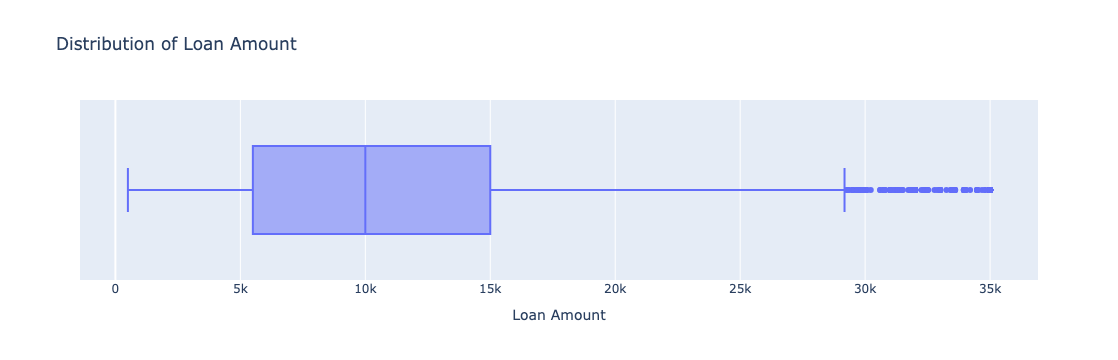

In [144]:
# Outlier detection in 'loan_amnt' by using boxplot
# Analyzing loan_amnt
# We begin by examining the distribution of loan amounts. Using Plotly, we create an interactive box plot to explore the data and retrieve the upper fence value.
py.box(loan, x='loan_amnt', width=750, height=350, title='Distribution of Loan Amount', labels={'loan_amnt': 'Loan Amount'}).show()

The calculated upper fence is 29,175, while the maximum loan amount is 35,000. Since this value is only slightly above the upper fence, its impact on the analysis is expected to be minimal.

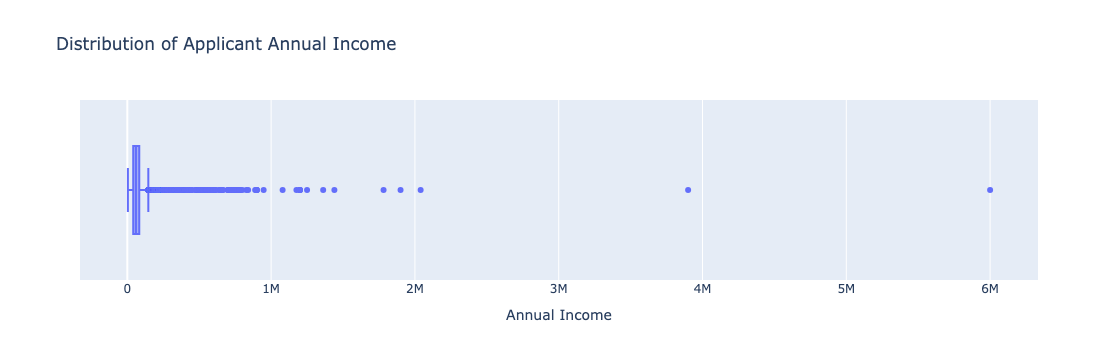

In [147]:
# Outlier detection in 'annual_inc' by using boxplot
# Analyzing annual_inc
# Using Plotly, we create an interactive box plot to explore the data and retrieve the upper fence value.
py.box(loan,x='annual_inc',width=750,height=350,title='Distribution of Applicant Annual Income',labels={'annual_inc':'Annual Income'}).show()

The upper fence is determined to be 146k, while the maximum value is 6000k, which significantly exceeds the upper fence. Therefore, we will remove the outliers in the annual_inc column.

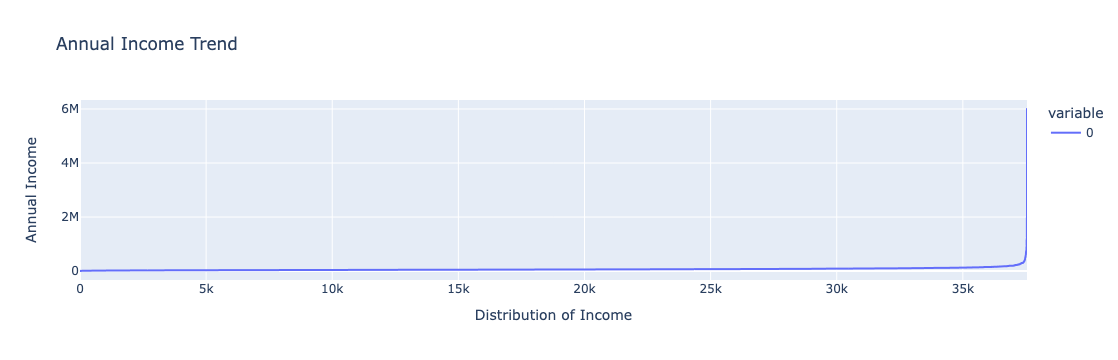

In [150]:
# Analyzing the trend of annual_inc values with a line chart to identify the appropriate quantile for outlier removal
# We use a line chart to visualize the trend of annual income values and determine the appropriate quantile for filtering outliers.
py.line(sorted(loan.annual_inc), width=750, height=350, title='Annual Income Trend', labels={'value': 'Annual Income', 'index': 'Distribution of Income'}).show()


In [152]:
# Checking the value of 99 percentile to check if the we can remove outlier on basis of percentile
np.percentile(loan['annual_inc'], 99)

235000.0

If we remove the data for the applicants having annual income equal to or above 235000.0, our analysis will be on much improved data set

In [155]:
# Removing the applicants having annual income more than or equal to 235000.0
loan = loan[loan.annual_inc <= 235000]

Visualizing the Trend of annual_inc to Identify an Appropriate Quantile for Outlier Removal
We use a line chart to examine the trend of values in the annual_inc column, helping us identify a suitable quantile for filtering outliers.

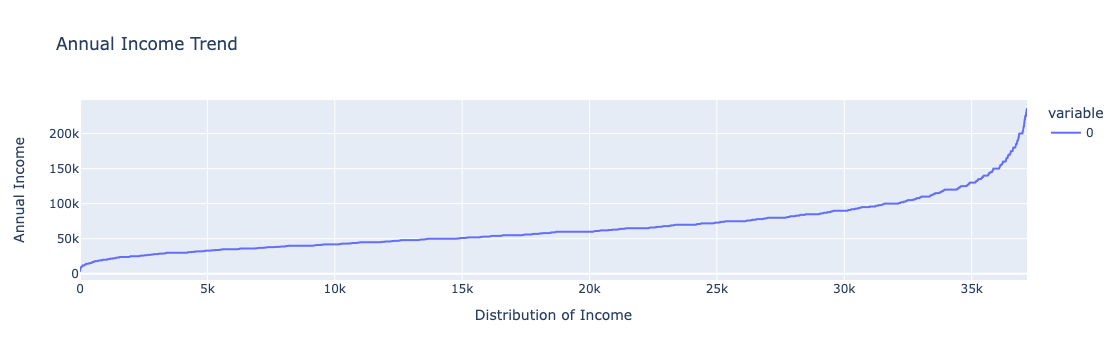

In [158]:
py.line(sorted(loan.annual_inc), width=750, height=350, title='Annual Income Trend', labels={'value':'Annual Income', 'index':'Distribution of Income'}).show()


Since the trend aligns well with the analysis, we can now proceed to examine other columns.

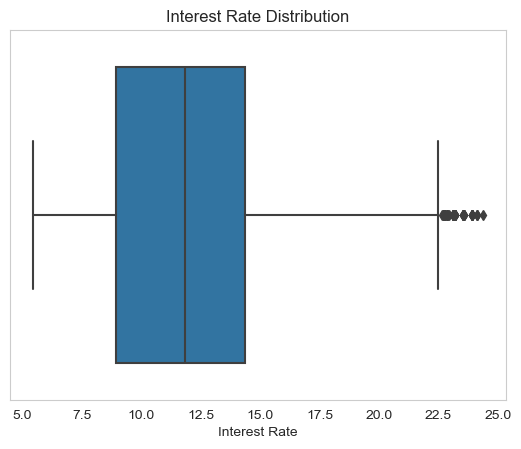

In [160]:
# Outlier detection in 'int_rate' by using boxplot
# Analyzing int_rate
sns.boxplot(x = loan['int_rate'])
plt.title('Interest Rate Distribution')
plt.xlabel('Interest Rate')
plt.show()

The upper fence is calculated to be 22.64, while the maximum value is 24.4. Since the maximum is only slightly above the upper fence, it is unlikely to significantly affect the analysis.

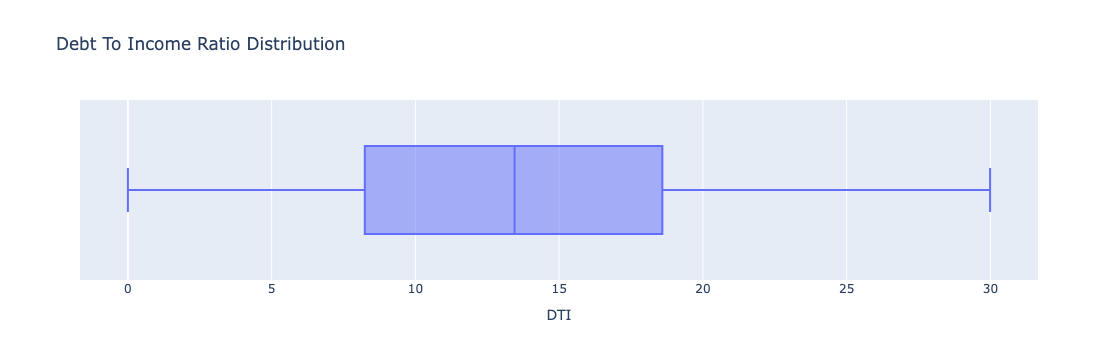

In [162]:
# Outlier detection in 'dti' by using boxplot
# Analyzing dti
# Using Plotly, we create an interactive box plot to explore the data and retrieve the upper fence value.
py.box(loan,x='dti',width=750,height=350,title='Debt To Income Ratio Distribution',labels={'dti':'DTI'}).show()


There are no significant outliers in the dti column.

### With the data cleaned and outliers addressed, we are now ready to continue with further analysis.

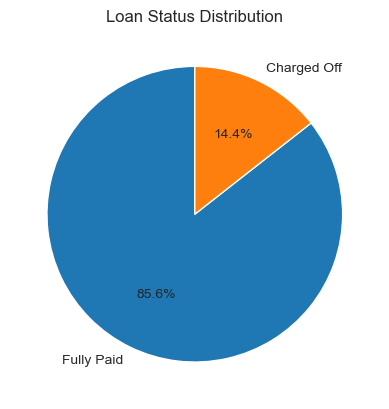

In [164]:
# Pie plot for loan status distribution
plt.pie(loan['loan_status'].value_counts(dropna = False), labels = loan['loan_status'].value_counts(dropna = False).index, autopct='%1.1f%%', startangle=90)
plt.title('Loan Status Distribution')
plt.show()

**Inference :** The fully paid loans are almost 6 times of defaulted loans.

count    37173.000000
mean     11034.824335
std       7272.289190
min        500.000000
25%       5400.000000
50%       9800.000000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64


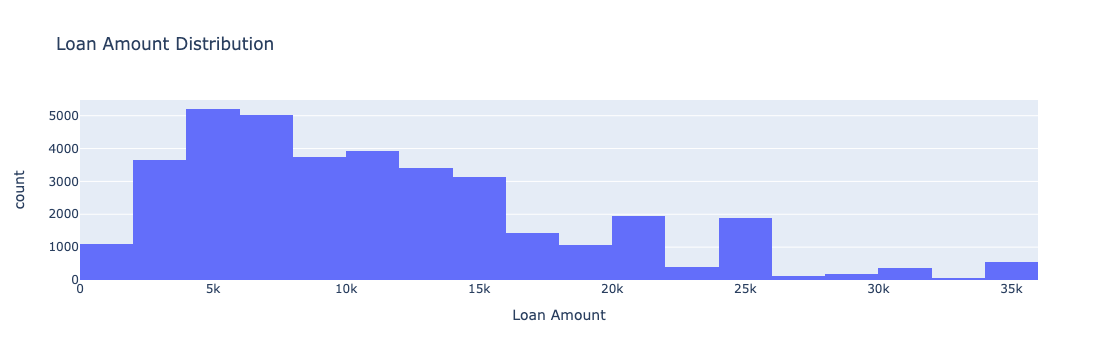

In [169]:
# Analysis spread Loan Amount
print(loan.loan_amnt.describe())
#Using histogram to check the distribution loan amount
py.histogram(loan, x='loan_amnt', width=750, height=350, title='Loan Amount Distribution', labels={'loan_amnt': 'Loan Amount'}, nbins=30).show()

**Inference :** The loan amount varies from 500 to 35000 with maximum loans between 5000 to 8000 and mean is 9800

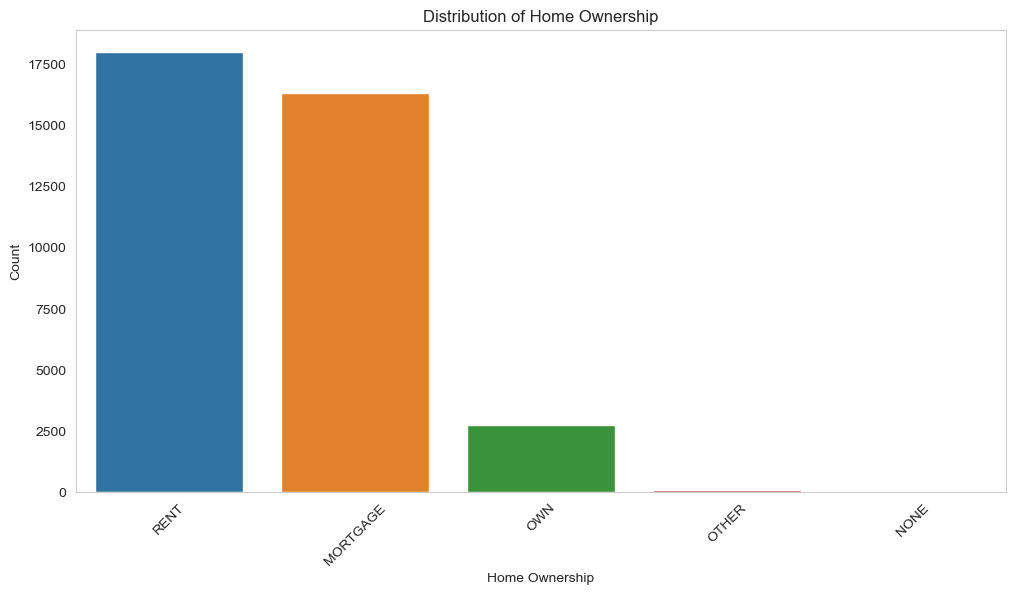

In [172]:
# Distribution of 'home_ownership' using bar plot
# Create a DataFrame with counts of each category in 'home_ownership'
home_ownership_counts = loan['home_ownership'].value_counts(dropna=False).reset_index()
home_ownership_counts.columns = ['Home Ownership', 'Count']

# Create a bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x='Home Ownership', y='Count', data=home_ownership_counts)
plt.title('Distribution of Home Ownership')
plt.xlabel('Home Ownership')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x labels if necessary for better readability
plt.show()

**Inference :** Most borrowers do not own property and are either renting or have a mortgage.

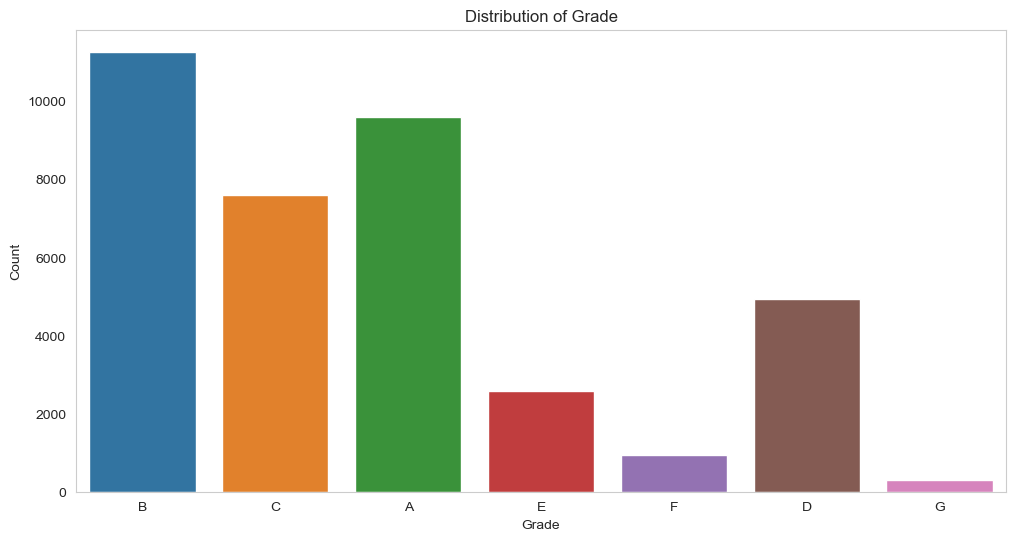

In [174]:
# Distribution of Grade using count plot
plt.figure(figsize=(12, 6))
sns.countplot(x='grade', data=loan)
plt.xlabel('Grade')
plt.ylabel('Count')
plt.title('Distribution of Grade')
plt.show()

**Inference :** A significant number of loans fall into the 'A' and 'B' grades, indicating that the majority of loans are of high quality.

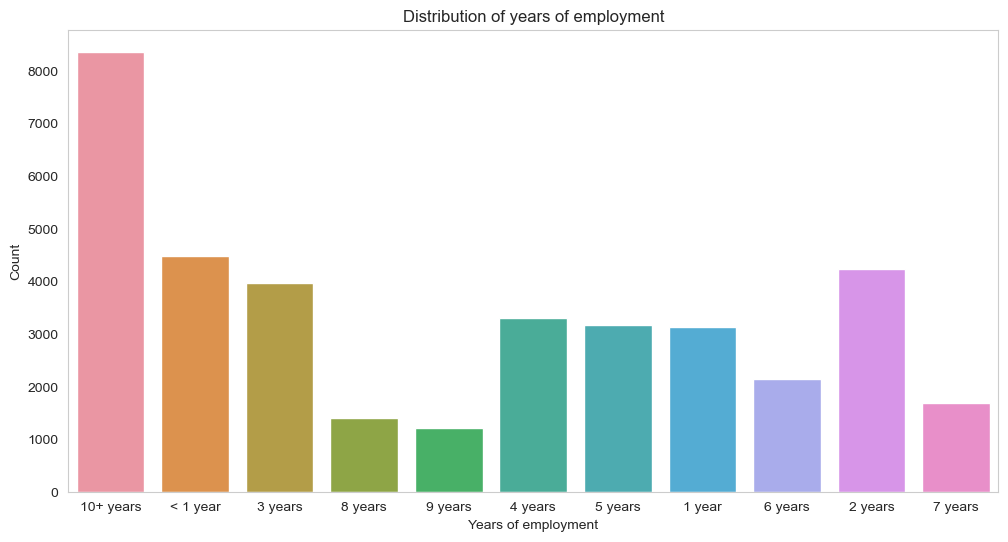

In [176]:
# Distribution of years of employment using count plot
plt.figure(figsize=(12,6))
sns.countplot(data=loan, x='emp_length')
plt.xlabel('Years of employment')
plt.ylabel('Count')
plt.title('Distribution of years of employment',fontsize=12)
plt.show()

**Inference :** Most borrowers have more than 10 years of work experience.

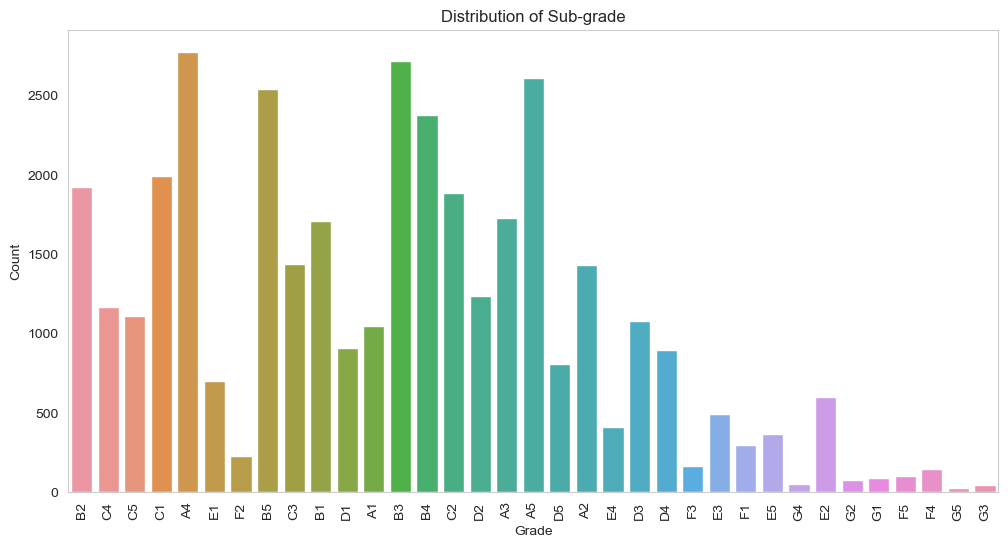

In [179]:
# Distribution of 'sub_grade' using count plot
plt.figure(figsize=(12,6))
sns.countplot(x='sub_grade', data=loan)
plt.xlabel('Grade')
plt.ylabel('Count')
plt.title('Distribution of Sub-grade')
plt.xticks(rotation=90)
plt.show()

**Inference :** A large amount of loans are with lower subgrade in grade 'A' and 'B' commpared to rest showing most loans are high grade loans. This matches with the Grade distribution.

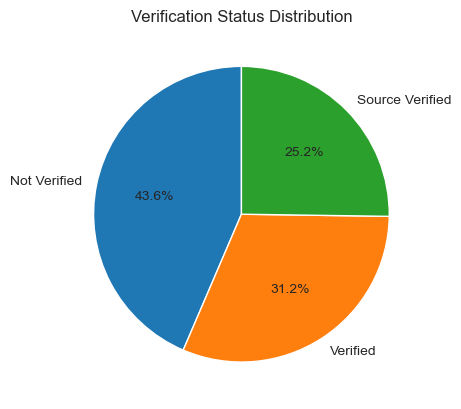

In [182]:
# Pie plot for Verification status distribution
plt.pie(loan['verification_status'].value_counts(dropna = False), labels = loan['verification_status'].value_counts(dropna = False).index, autopct='%1.1f%%', startangle=90)
plt.title('Verification Status Distribution')
plt.show()

**Inference :** Approximately 50% of borrowers are either verified by the company or have their sources confirmed.

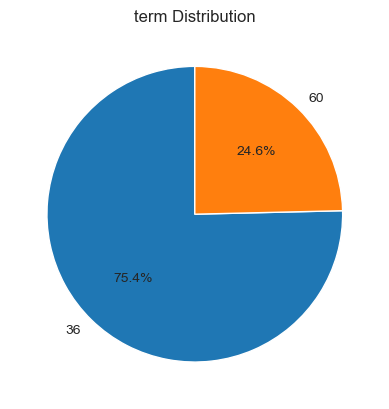

In [185]:
# Pie plot for 'term' distribution
plt.pie(loan['term'].value_counts(dropna = False), labels = loan['term'].value_counts(dropna = False).index, autopct='%1.1f%%', startangle=90)
plt.title('term Distribution')
plt.show()

**Inference :**  The loans taken/granted for a term of 3 years is 3 times of those of 5 years

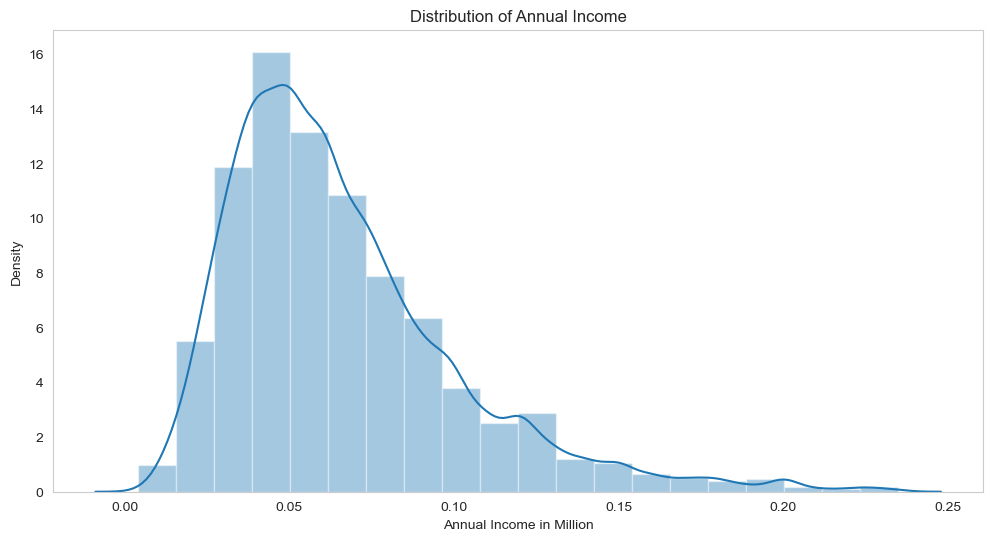

In [191]:
# Distribution of annual income using distplot
plt.figure(figsize=(12,6))
sns.distplot(loan.annual_inc/1000000,kde=True,bins=20)
plt.xlabel('Annual Income in Million')
plt.ylabel('Density')
plt.title('Distribution of Annual Income',fontsize=12)
plt.show()

**Inference :** The annual income exhibits a left-skewed normal distribution, indicating that most borrowers have a significantly lower annual income compared to others.

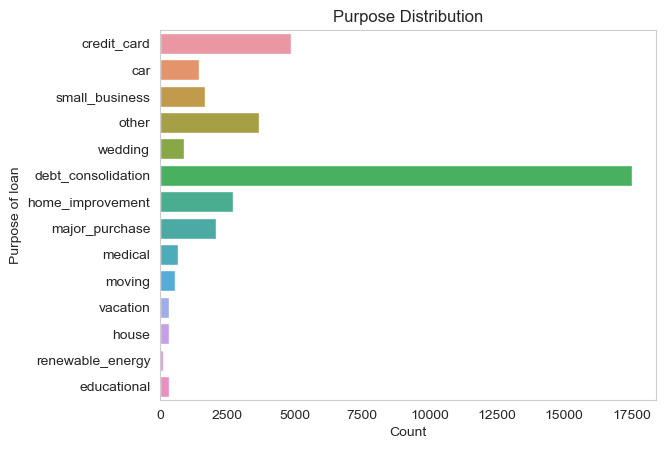

In [194]:
# Countplot of 'purpose' for analyzing distribution
sns.countplot(y=loan['purpose'])
plt.title('Purpose Distribution')
plt.xlabel('Count')
plt.ylabel('Purpose of loan')
plt.show()

**Inference :** A significant proportion of loans are obtained for debt consolidation, followed by those for credit card repayment. 

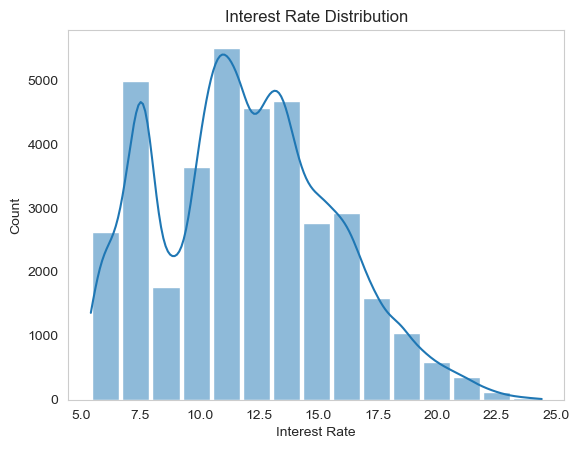

In [197]:
# Distplot of Interest Rate fro analyzing distribution
sns.histplot(loan['int_rate'], bins=15, kde=True, shrink=0.9)
plt.title('Interest Rate Distribution')
plt.xlabel('Interest Rate')
plt.ylabel('Count')
plt.show()

**Inference :** The interest rates are predominantly concentrated between 5-10 and 10-15, with a noticeable decline around the 10 mark.

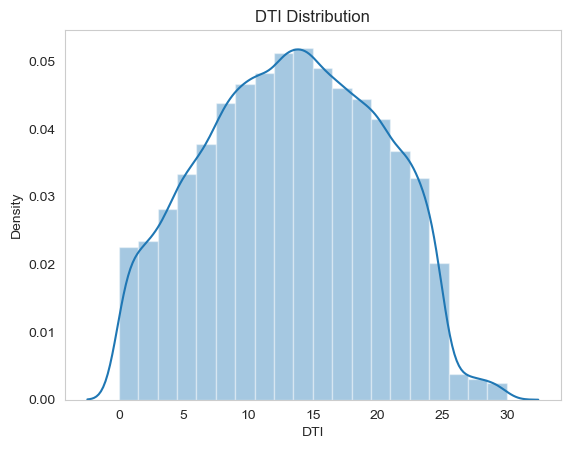

In [200]:
# Distplot of DTI for analyzing distribution
sns.distplot(loan['dti'], bins=20, kde=True)
plt.title('DTI Distribution')
plt.xlabel('DTI')
plt.ylabel('Density')
plt.show()

**Inference :**  Most borrowers have a substantial amount of debt relative to their recorded income, particularly concentrated in the 10-15 DTI ratio.

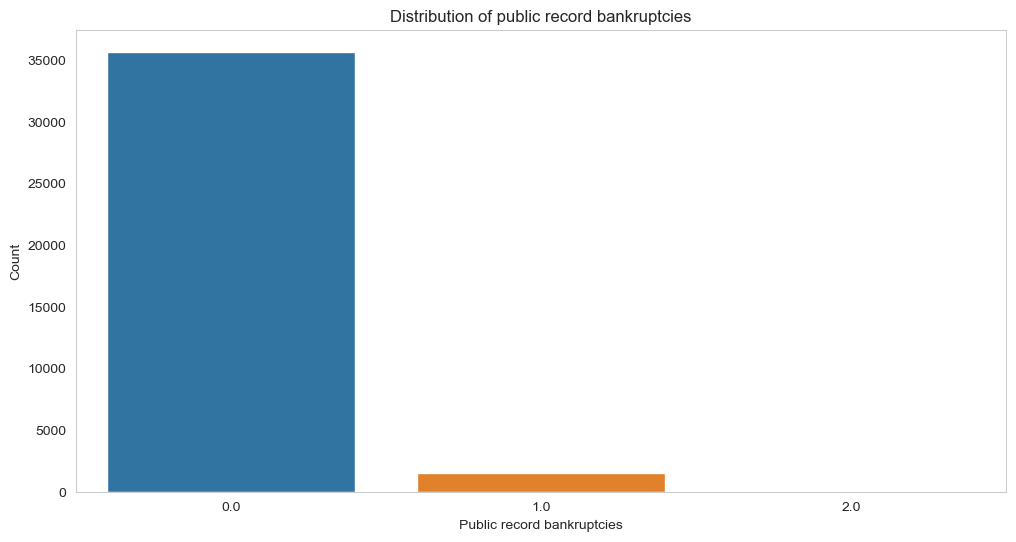

In [1034]:
# Barplot of 'pub_rec_bankruptcies' for analysing distribution
plt.figure(figsize=(12,6))
sns.countplot(data=loan, x='pub_rec_bankruptcies')
plt.xlabel('Public record bankruptcies')
plt.ylabel('Count')
plt.title('Distribution of public record bankruptcies',fontsize=12)
plt.show()

**Inference :** Most borrowers have no history of public recorded bankruptcy.

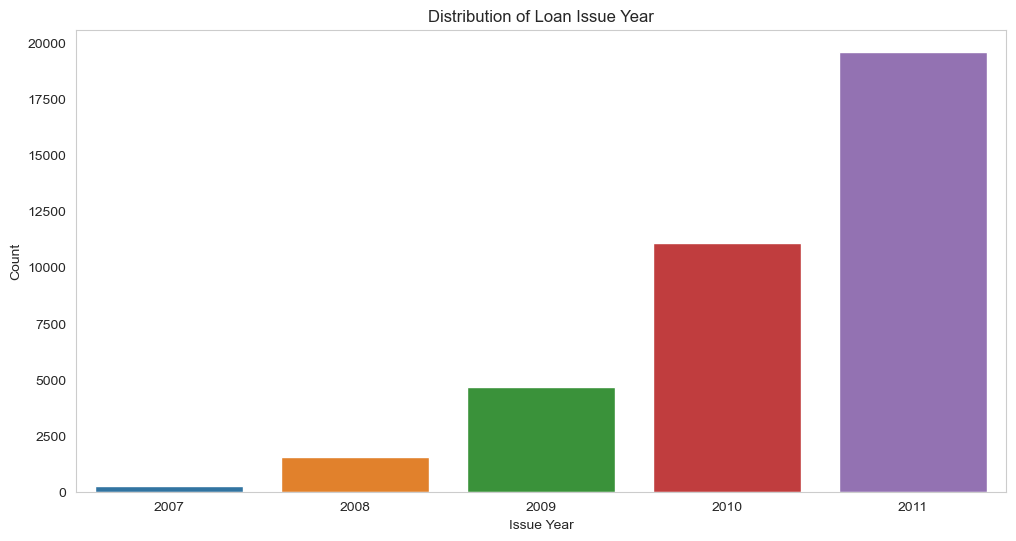

In [202]:
# Distribution of issue_year using count plot
plt.figure(figsize=(12,6))
sns.countplot(data=loan,x='issue_year')
plt.xlabel('Issue Year')
plt.ylabel('Count')
plt.title('Distribution of loan issue year',fontsize=12)
plt.show()

**Infernce :** The number of approved loans rises at an signiicantly over time, indicating that the loan approval rate is increasing as time progresses.

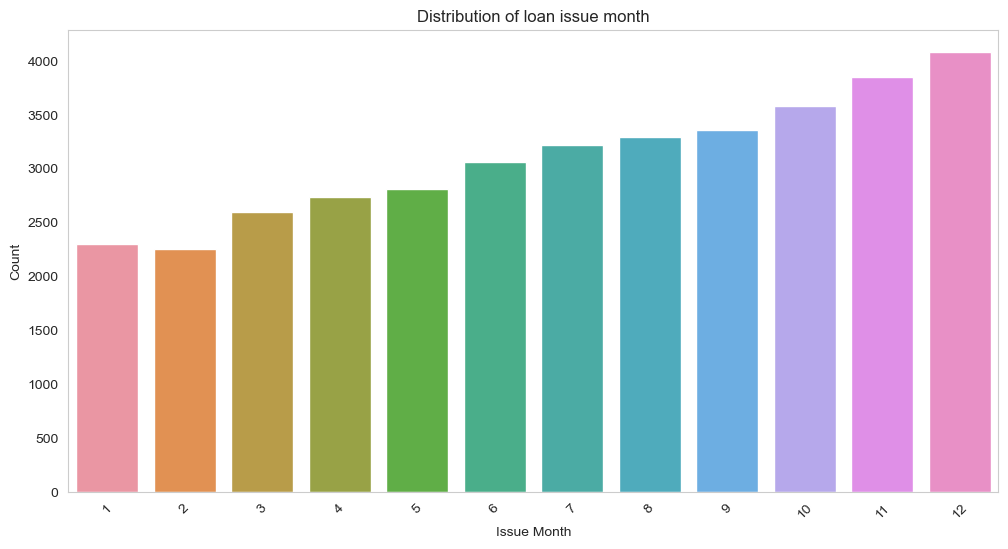

In [204]:
# Distribution of issue_month using count plot

plt.figure(figsize=(12, 6))
sns.countplot(x='issue_month',data=loan)  # Use 'x' and specify 'data'
plt.xlabel('Issue Month')
plt.ylabel('Count')
plt.title('Distribution of loan issue month', fontsize=12)
plt.xticks(rotation=45)  # Rotate x labels if necessary for better readability
plt.show()

**Inference :** Most loans are issued in the last quarter of the year.

## Bivariate analysis

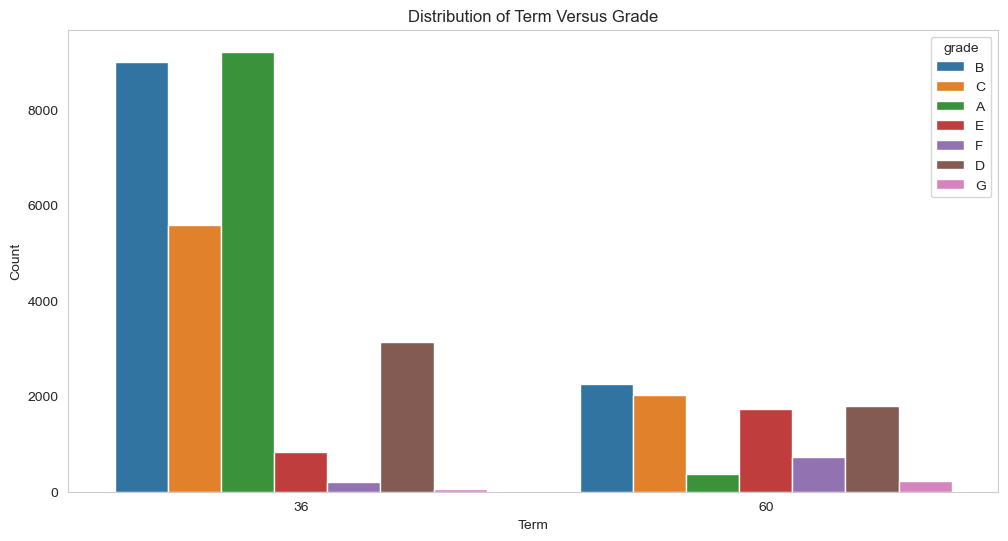

In [208]:
# Distribution of term as per grade
plt.figure(figsize=(12,6))
sns.countplot(data=loan,x='term',hue='grade')
plt.xlabel('Term')
plt.ylabel('Count')
plt.title('Distribution of Term Versus Grade',fontsize=12)
plt.show()

**Inference :** The loans in 36 month term majorily consist of grade A and B loans whereas the loans in 60 month term mostly consist of grade B, C and D loans.



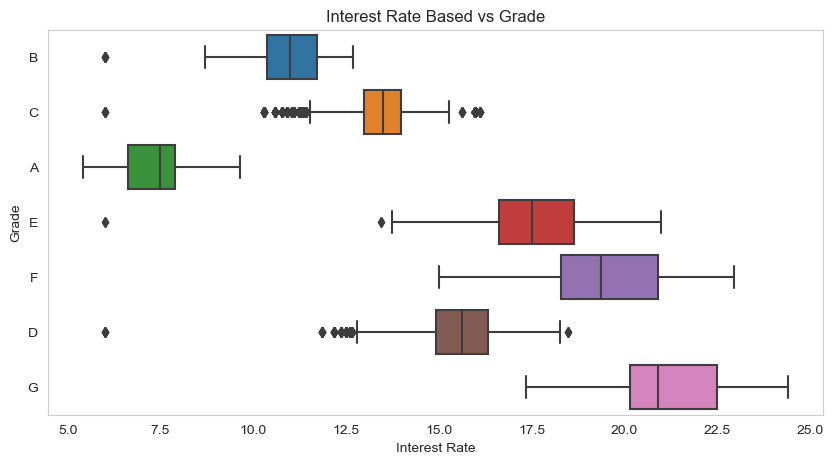

In [211]:
# Interest rate as per grade
plt.figure(figsize=(10,5))
sns.boxplot(data=loan,x='int_rate',y='grade')
plt.xlabel('Interest Rate')
plt.ylabel('Grade')
plt.title('Interest Rate Based vs Grade',fontsize=12)
plt.show()

**Inference :** The grade serves as an indicator of risk, indicating that the interest rate tends to rise with higher risk levels.

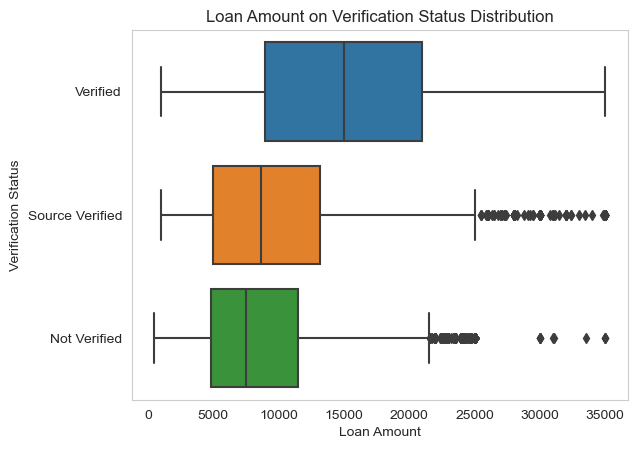

In [214]:
# boxplot of loan amount as per verification status
sns.boxplot(x=loan['loan_amnt'], y=loan['verification_status'])
plt.title('Loan Amount on Verification Status Distribution')
plt.xlabel('Loan Amount')
plt.ylabel('Verification Status')
plt.show()

**Inference :** Higher amount of loan is given for applicants who are 'Verified', followed by 'Source verified', followed by 'Not Verified'.

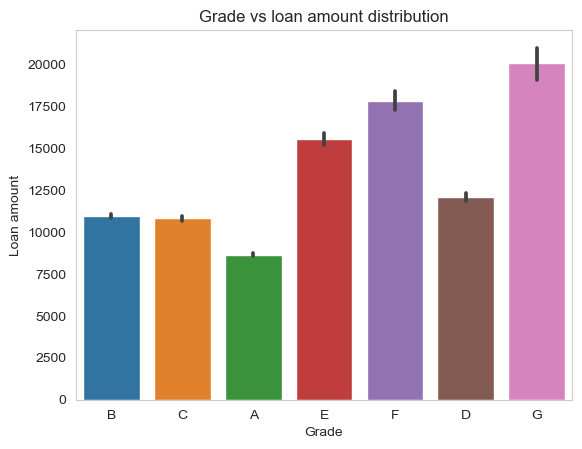

In [219]:
# Barplot of grade as per loan amount ####
sns.barplot(x='grade', y='loan_amnt', data=loan)
plt.title('Grade vs loan amount distribution')
plt.xlabel('Grade')
plt.ylabel('Loan amount')
plt.show()

**Inference :** Loan amount for low quality/grade loans like like 'E', 'F', 'G' are higher.

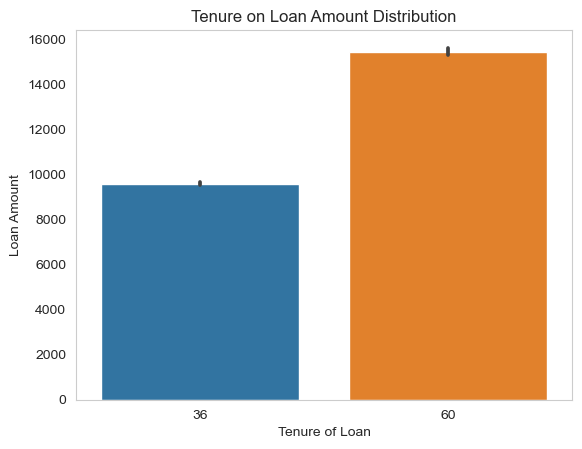

In [1176]:
# Barplot of Loan Amount vs Tenure
sns.barplot(x='term', y='loan_amnt', data=loan)
plt.title('Tenure on Loan Amount Distribution')
plt.xlabel('Tenure of Loan')
plt.ylabel('Loan Amount')
plt.show()

**Inference :** Loan Amount for 5 year tenure is 60% higher than of 3 years.

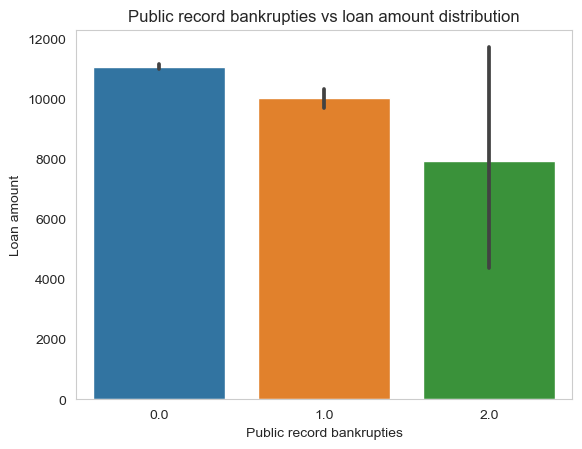

In [1297]:
# Barplot of public record bankrupties as per loan amount
sns.barplot(x='pub_rec_bankruptcies', y='loan_amnt', data=loan)
plt.title('Public record bankrupties vs loan amount distribution')
plt.xlabel('Public record bankrupties')
plt.ylabel('Loan amount')
plt.show()

**Inference :** Higher Loan is sanctioned if 'Public Record Bankrupties' is less

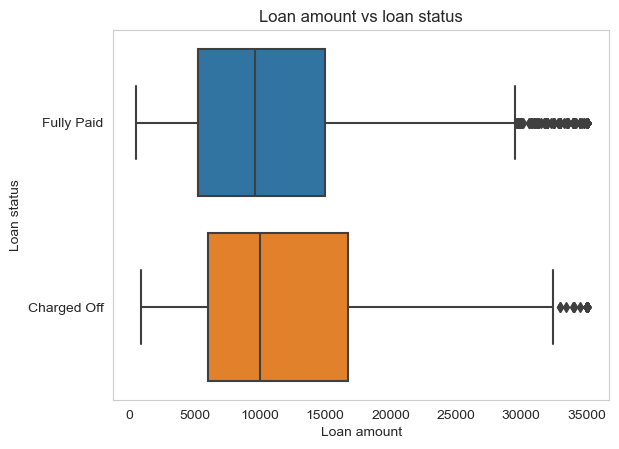

In [1191]:
# boxplot of loan amount vs loan status
sns.boxplot(x=loan['loan_amnt'], y=loan['loan_status'])
plt.title('Loan amount vs loan status')
plt.xlabel('Loan amount')
plt.ylabel('Loan status')
plt.show()

**Inference :** The 50th and 25th percentile are identical for both categories; however, the 75th percentile is significantly higher for defaulted loans. This suggests that larger loan amounts are more likely to result in defaults.

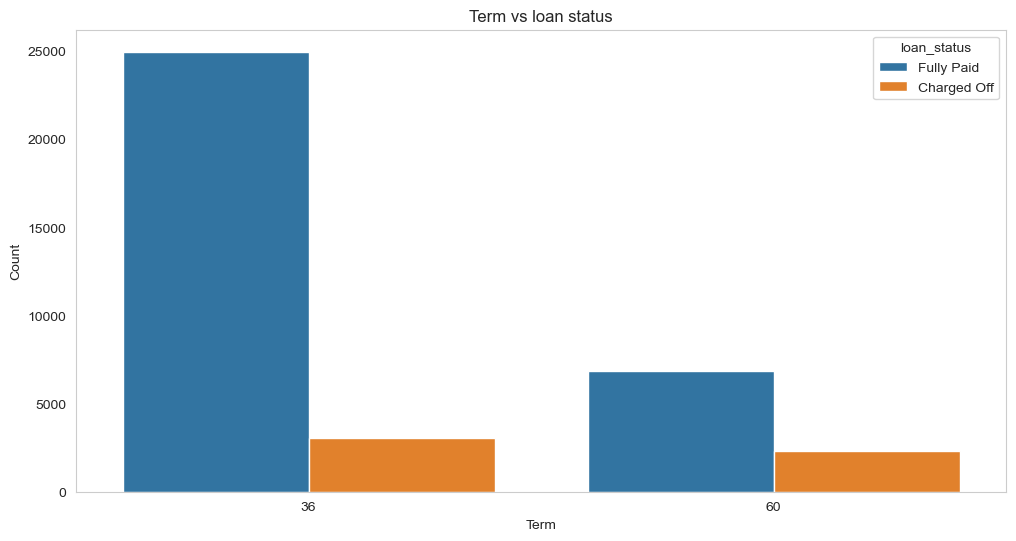

In [1189]:
# Distribution of term as per loan status
plt.figure(figsize=(12,6))
sns.countplot(data=loan,x='term',hue='loan_status')
plt.xlabel('Term')
plt.ylabel('Count')
plt.title('Term vs loan status',fontsize=12)
plt.show()

**Inference :** Loans with a 60-month term have a higher likelihood of defaulting compared to those with a 36-month term, whereas the 36-month term loans have a greater probability of being fully paid.

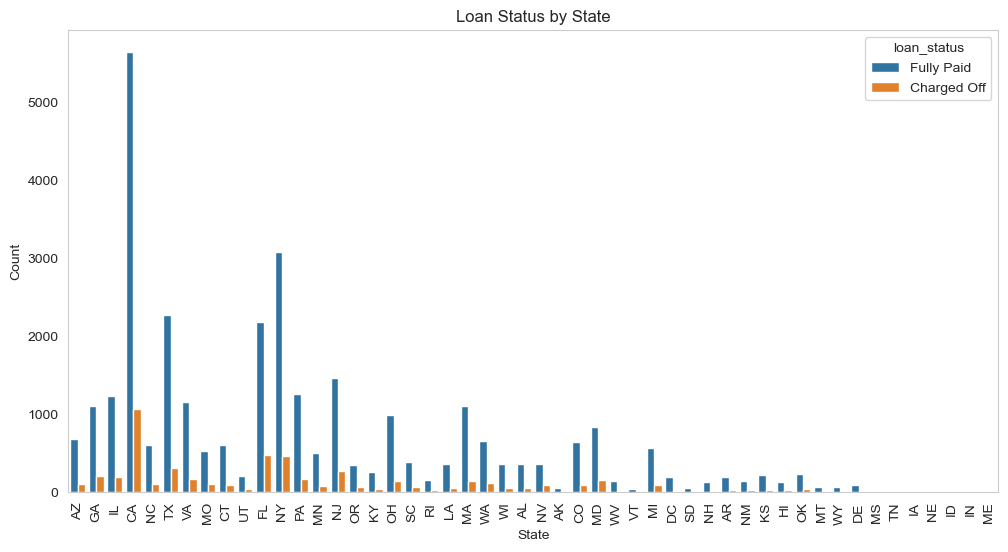

In [1312]:
# Distribution of loan status as per state
plt.figure(figsize=(12, 6))
sns.countplot(data=loan, x='addr_state', hue='loan_status')
plt.xlabel('State')
plt.ylabel('Count')
plt.title('Loan Status by State', fontsize=12)
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.show()

**Inference :** Most borrowers originate from major urban areas, including states like California, New York, Texas, Florida, and others.

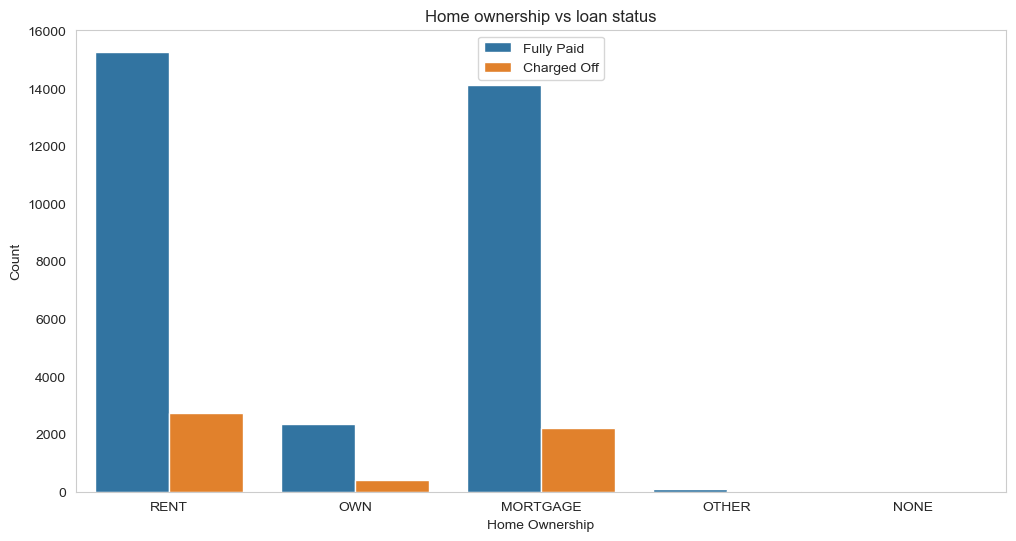

In [1187]:
# Distribution of house ownership as per loan status
plt.figure(figsize=(12,6))
sns.countplot(data=loan,x='home_ownership',hue='loan_status')
plt.xlabel('Home Ownership')
plt.ylabel('Count')
plt.title('Home ownership vs loan status',fontsize=12)
plt.legend(loc='upper center')
plt.show()


**Inference :** Borrowers who own their property have a lower rate of defaulted loans compared to those who are on a mortgage or renting.

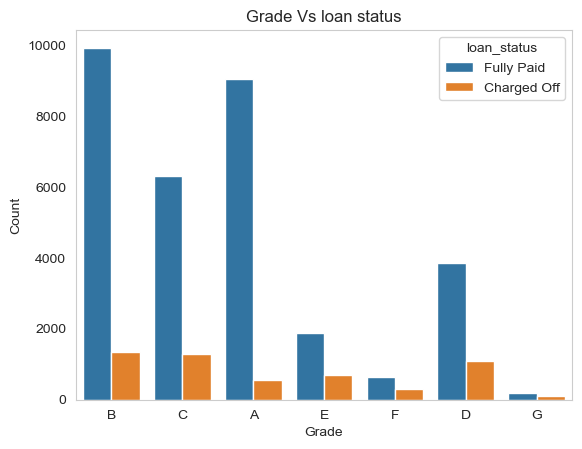

In [225]:
# Countplot of grade as per loan status
sns.countplot(x='grade', hue='loan_status', data=loan)
plt.title('Grade Vs loan status')
plt.xlabel('Grade')
plt.ylabel('Count')
plt.show()

**Inference :** The ratio of 'charged off' loans to 'fully paid' loans is much lower in case of high quality grades like 'A','B','C'. The chances of default increases with low quality grades like 'E', 'F', 'G'

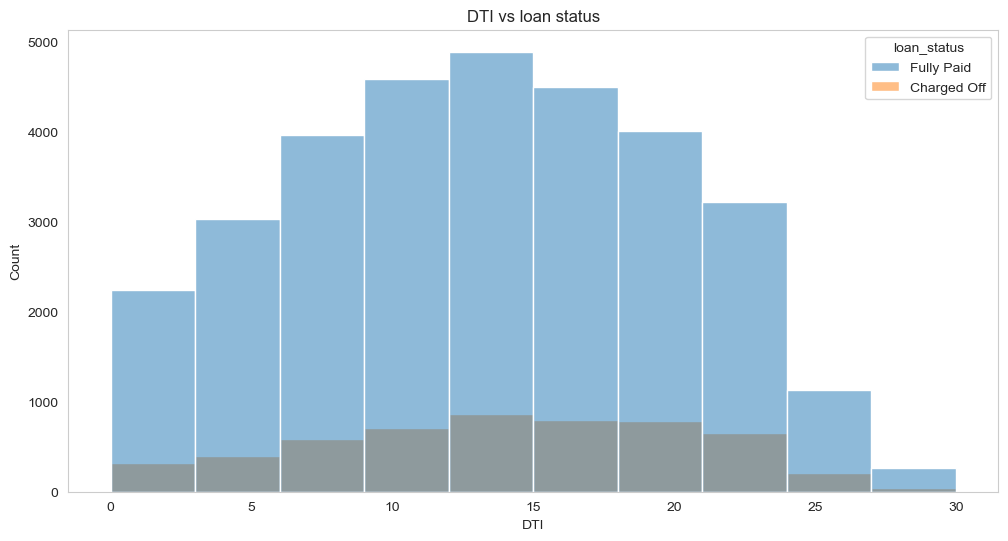

In [1295]:
# Distribution of DTI per as loan status
plt.figure(figsize=(12,6))
sns.histplot(data=loan,x='dti',hue='loan_status',bins=10)
plt.xlabel('DTI')
plt.ylabel('Count')
plt.title('DTI vs loan status',fontsize=12)
plt.show()

**Inference :** The loan status varies with the DTI ratio. Loans with a DTI ratio of 10-15 show a higher number of defaults, but as the DTI ratio increases further, the likelihood of defaulting becomes even greater.

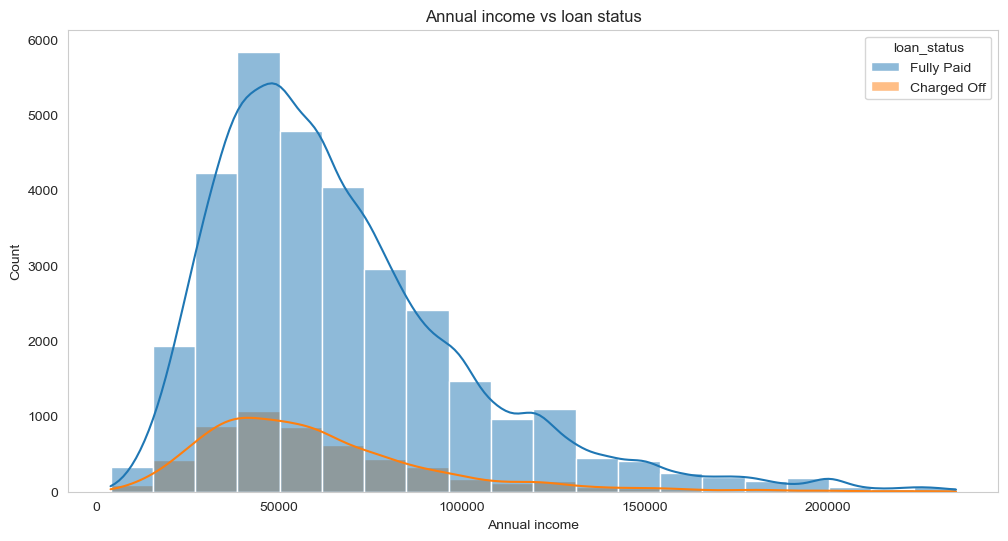

In [1207]:
# Distribution of annual income as per loan_status
plt.figure(figsize=(12,6))
sns.histplot(data=loan,x='annual_inc',hue='loan_status',bins=20,kde=True)
plt.xlabel('Annual income')
plt.ylabel('Count')
plt.title('Annual income vs loan status',fontsize=12)
plt.show()


**Inference :** Borrowers with an annual income of less than 50,000 are more likely to default, while those with higher annual incomes are less likely to default.

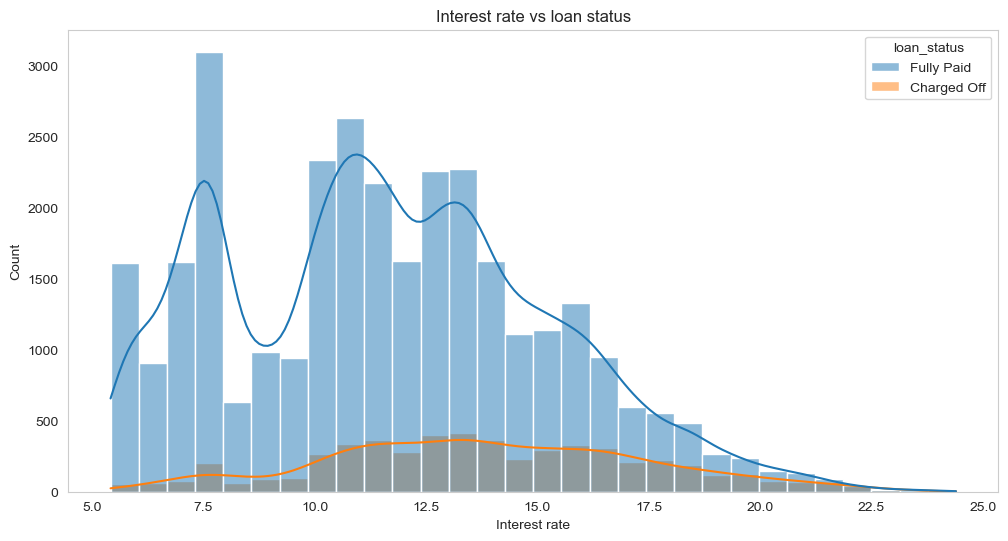

In [1213]:
# Distribution of int_amnt based on loan_status
plt.figure(figsize=(12,6))
sns.histplot(data=loan,x='int_rate',hue='loan_status', bins=30, kde=True)
plt.xlabel('Interest rate')
plt.ylabel('Count')
plt.title('Interest rate vs loan status',fontsize=12)
plt.show()

**Inference :** The amount of defaulted loans tends to rise as the interest rate increases, but a decline is observed after the interest rate surpasses 17%.

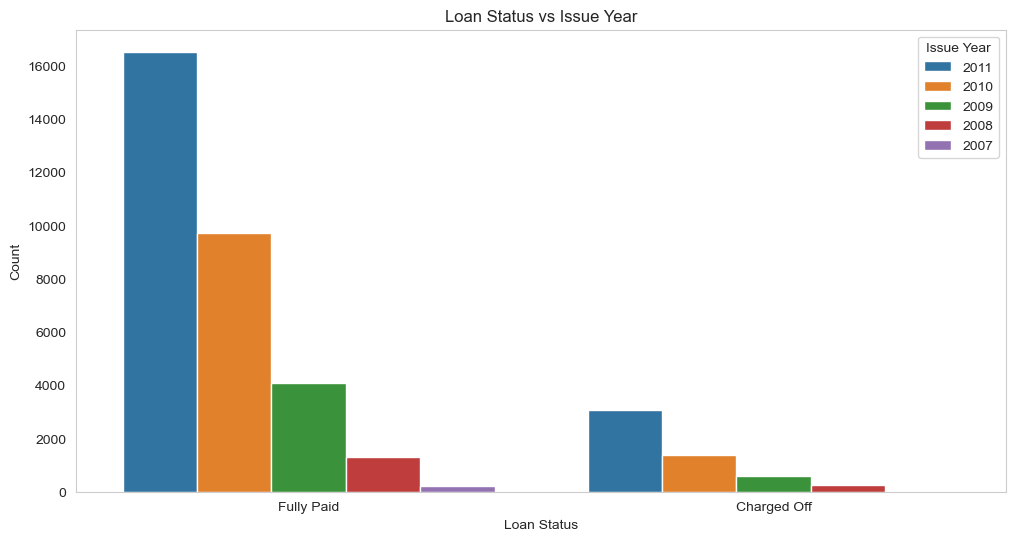

In [1229]:
# Distribution of loan status as per issue_year
# Convert 'issue_year' to string to avoid legend issues
loan['issue_year'] = loan['issue_year'].astype(str)

# Plotting countplot
plt.figure(figsize=(12,6))
sns.countplot(data=loan, x='loan_status', hue='issue_year')
plt.xlabel('Loan Status')
plt.ylabel('Count')
plt.title('Loan Status vs Issue Year', fontsize=12)
plt.legend(title='Issue Year', loc='upper right')
plt.show()

**Inference :** The number of fully paid loans has been increasing at an exponential rate over time, while defaulted loans have not shown the same growth.

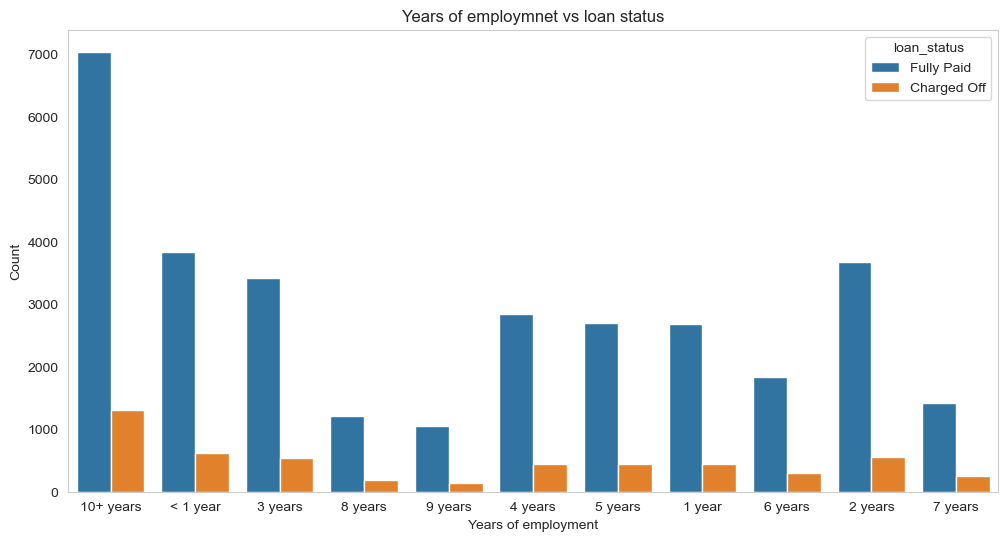

In [1236]:
# Distribution of years of employment as per loan_status
plt.figure(figsize=(12,6))
sns.countplot(data=loan,x='emp_length',hue='loan_status')
plt.xlabel('Years of employment')
plt.ylabel('Count')
plt.title('Years of employmnet vs loan status',fontsize=12)
plt.show()

**Inference :** Employees with over 10 years of experience are more likely to default, but they also have a higher likelihood of fully repaying their loans.

## Multivariate Analysis

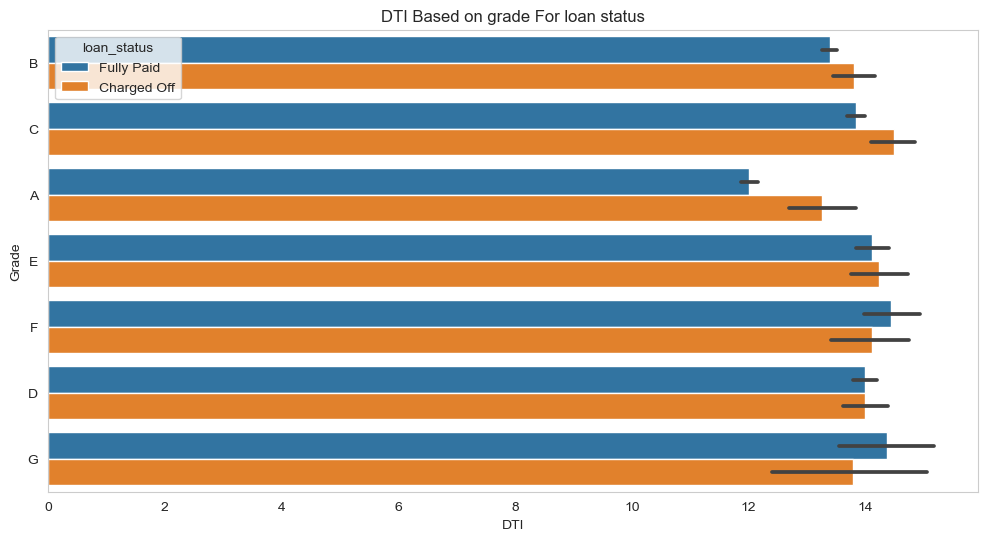

In [1271]:
# DTI over grade for loan status
plt.figure(figsize=(12,6))
sns.barplot(data=loan,x='dti',y='grade',hue='loan_status')
plt.xlabel('DTI')
plt.ylabel('Grade')
plt.title('DTI Based on grade For loan status',fontsize=12)
plt.show()

**Inference :** The Grade A loans, representing the lowest risk, also exhibit the lowest DTI ratio. This suggests that higher-grade loans are associated with a lower rate of default.

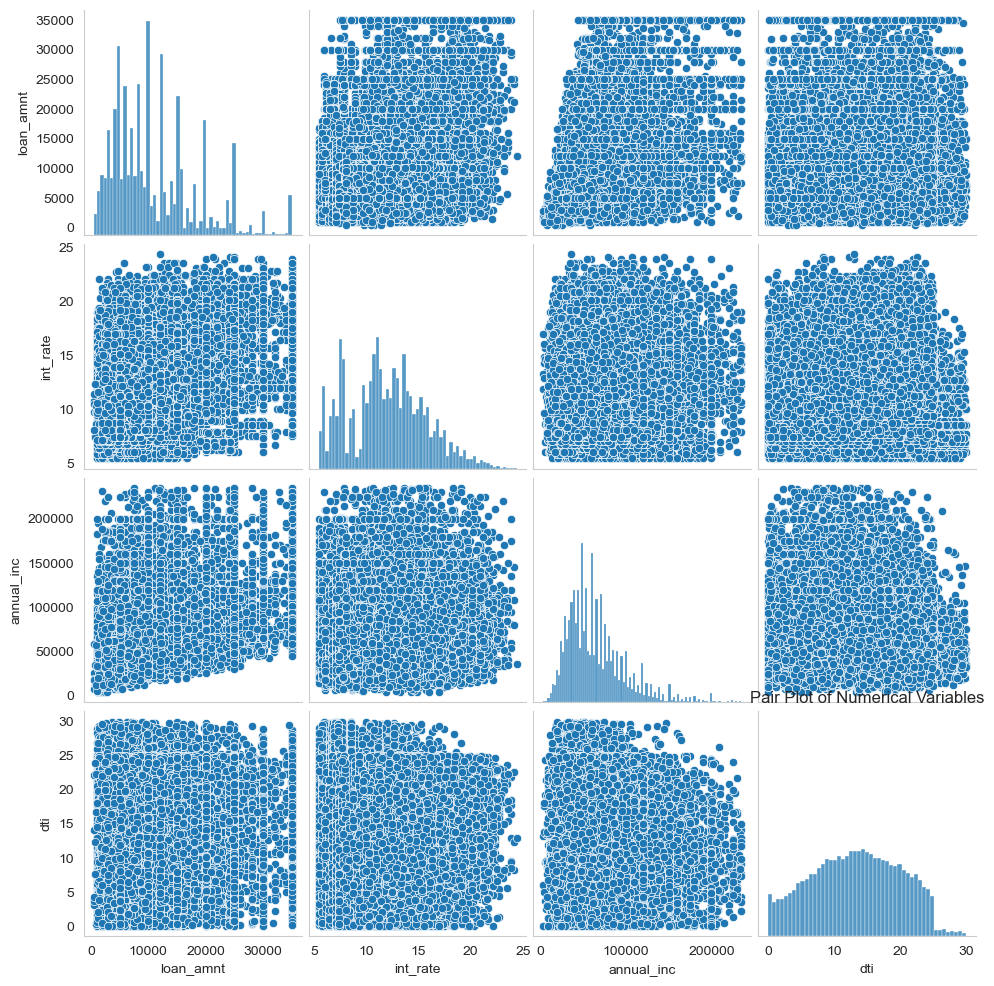

In [1286]:
# Pairplot of numeric columns
sns.pairplot(loan[['loan_amnt', 'int_rate', 'annual_inc', 'dti']])
plt.title('Pair Plot of Numerical Variables')
plt.show()

**Inference :** This shows all the plots and that we analysed.

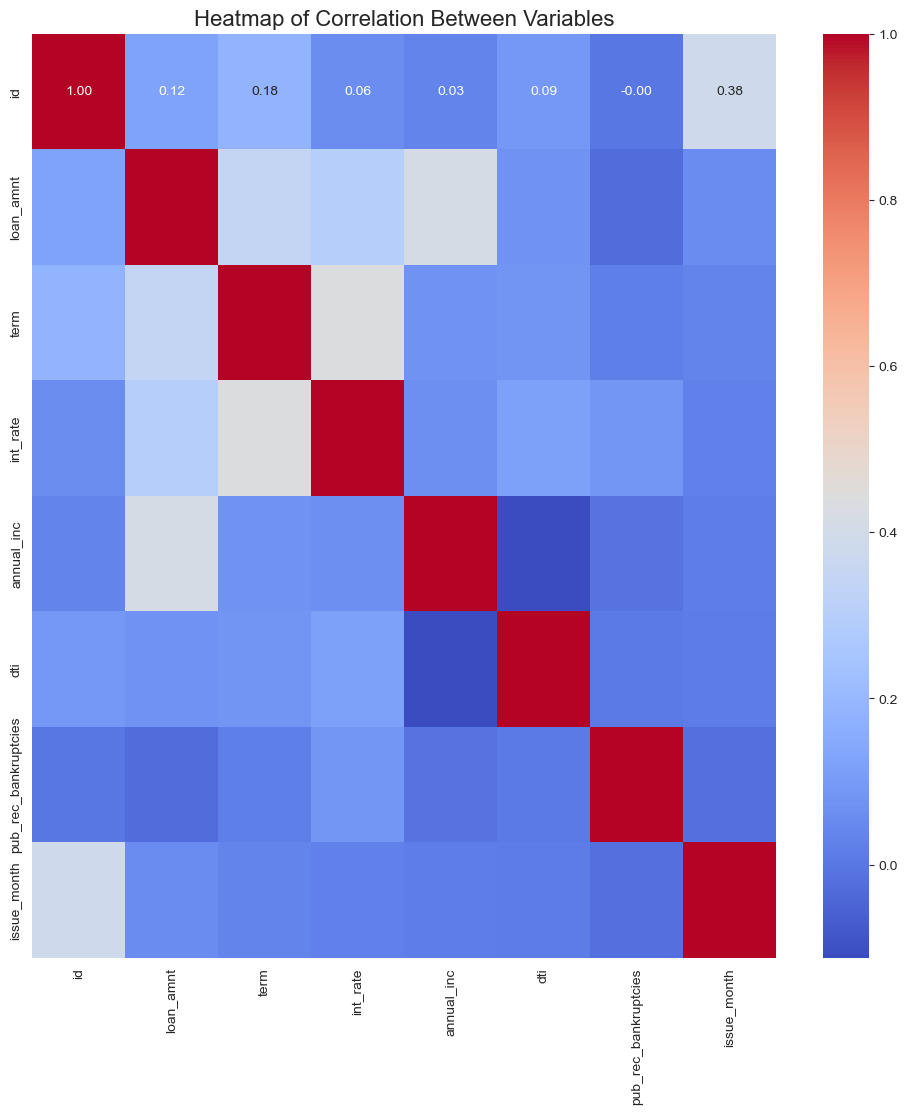

In [1282]:
# Heatmap of correlation between variables
# Select only numeric columns for correlation
numeric_cols = loan.select_dtypes(include=[np.number])  # This selects numeric columns

# Heatmap of correlation between numeric variables
plt.figure(figsize=(12, 12))
sns.heatmap(numeric_cols.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Heatmap of Correlation Between Variables', fontsize=16)
plt.show()

# Findings and Recommendations

## Univariate Analysis
- A significant portion of loans have a term of 36 months, surpassing those with a 60-month term.
- The number of loans that have defaulted is seven times lower than those that have been fully paid.
- Most borrowers do not own property and instead are either renting or have mortgages.
- The majority of borrowers possess over 10 years of work experience.
- Interest rates are predominantly clustered around the 5-10% and 10-15% ranges, with a noticeable dip near 10%.
- Approximately 50% of borrowers have been verified by the lending company or have a verified income source.
- Most borrowers carry substantial debt in relation to their reported income, especially concentrated in the 10-15 DTI (Debt-to-Income) ratio range.
- Annual income data reveals a left-skewed distribution, suggesting that most borrowers report very low annual incomes relative to others.
- A considerable percentage of loans are sought for debt consolidation, followed closely by those for credit card payments.
- The bulk of borrowers originate from major urban centers such as California, New York, Texas, and Florida.
- A significant number of borrowers have no recorded history of public bankruptcies.
- The last quarter of the year sees the highest volume of loan approvals.
- The approval rate for loans has been rising exponentially over time.

## Bivariate Analysis Analysis
- Debt consolidation emerges as the primary purpose for loans, boasting the highest count of both fully paid and defaulted loans.
- The mean and 25th percentile values for both loan statuses are identical, yet the 75th percentile is noticeably higher in defaulted loans, indicating a greater likelihood of default with larger loan amounts.
- Loans with a 60-month term carry a higher risk of default compared to 36-month loans, while the latter have a greater tendency for being fully paid.
- Loans in the 36-month term are primarily composed of grades A and B, while those in the 60-month term largely consist of grades B, C, and D.
- The relationship between loan status and DTI ratio indicates that loans within the 10-15 DTI range have a higher incidence of defaults, although higher DTI ratios also correlate with a greater risk of default.
- Borrowers who own their homes exhibit a lower rate of default compared to those who are mortgaging or renting.
- The number of fully paid loans is increasing at a faster rate compared to defaulted loans.
- Borrowers with annual incomes below 50,000 are more prone to default, whereas those with higher incomes are less likely to do so.
- The amount of defaulted loans tends to rise with interest rates, showing a decline after reaching an interest rate of 17%.
- Employees with over 10 years of experience are more likely to default but also have a greater chance of fully repaying their loans.
- Most borrowers lack a history of public recorded bankruptcies, making them safer candidates for loan approvals.
- The loan grade acts as a risk indicator, suggesting that interest rates escalate with increasing risk levels.
- Grade A loans, being the least risky, also have the lowest DTI ratios, reinforcing the notion that higher-grade loans have a lower default rate.

# Recommendations

## Key Predictive Factors for Default Risk:
- DTI Ratio
- Verification Status
- Loan Grades
- Annual Income
- Public Record Bankruptcies

## Additional Considerations for Default Risks:
- Borrowers exhibiting a very high Debt-to-Income ratio.
- Borrowers with recorded histories of bankruptcy.
- Borrowers with lower grades, such as E, F, and G, which indicate higher risk levels.
- Borrowers with annual incomes between 50,000 and 100,000.
- Borrowers not residing in major urban centers such as California, New York, Texas, and Florida because major borrowers belongs to urban centers.
- Borrowers with over 10 years of work experience.
